# Importing all the libaraies 

In [166]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns
                                                                                    
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# resample the dataset
#from sklearn.utils import resample
#from sklearn.utils import shuffle

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

import random

In [167]:
pd.set_option('display.max_row',None)

# Loading data set

In [168]:
# Read csv file
df=pd.read_csv("dataset.csv")
df.tail(50)

encounter_id  patient_id  hospital_id       age       bmi  \
91663        107930       84271            6 62.000000 37.120368   
91664         34540        7842           30 50.000000 23.717173   
91665         11453       18588           30 74.000000 26.993571   
91666         97171       83171           30 70.000000 25.403912   
91667         58422       77066           30 69.000000 25.162967   
91668         18721        3646          195 59.000000 25.659639   
91669         10631       96906          195 85.000000 23.530114   
91670         86506      120949           30       NaN 23.530366   
91671         83317       45003            6 72.000000 32.888794   
91672         17487       41855            6 69.000000 33.499047   
91673         16554       44389            6 60.000000 35.236760   
91674         71257       90374          121       NaN 19.994961   
91675        126222       21434          195 28.000000 67.814990   
91676         44845       78080            6 74.000000 26.153278   
91677        122563      106665          195 32.000000 32.304688   
91678         29232       71023           30 37.000000 46.155648   
91679        107657       42402           30 69.000000 27.172742   
91680         46336       53472           30 47.000000 25.581066   
91681         90623       51874           30 70.000000 32.522449   
91682         98998       61509          195 83.000000 30.080782   
91683        106800       98661            6 75.000000 41.240169   
91684         93704       90014          121 19.000000 21.849332   
91685         27176       34169          184 58.000000 25.360019   
91686         13520       96615          184 86.000000 31.157451   
91687         76490       85324          195 71.000000 32.690378   
91688         24687        1613          195 49.000000 31.866165   
91689         47573       27439            6       NaN 24.445450   
91690         15896       46682          195 83.000000 26.760649   
91691         96280       27717          184 59.000000 29.384757   
91692        125145       56872           30 36.000000 20.575852   
91693         57002       57515          183       NaN 18.526701   
91694         54174       38625           30 58.000000 33.211359   
91695         41182       88364           30 49.000000 21.748106   
91696         18985       20726           30 65.000000       NaN   
91697        128303       51968          195 33.000000 24.488889   
91698         83806       68549          195 47.000000 51.439842   
91699         79858       57121           30 57.000000 33.810548   
91700        103983       25454           30 85.000000 25.091529   
91701        118430       83320            6 21.000000 24.874059   
91702          1216       97004           30 18.000000 20.284799   
91703         65539      128056           30 53.000000 45.935203   
91704         96325       77671           30 38.000000 32.992923   
91705        111411        7848          195 67.000000 28.876843   
91706        127138       59223          121 54.000000 19.770448   
91707           276       34638          183       NaN 33.933518   
91708         91592       78108           30 75.000000 23.060250   
91709         66119       13486          121 56.000000 47.179671   
91710          8981       58179          195 48.000000 27.236914   
91711         33776      120598           66       NaN 23.297481   
91712          1671       53612          104 82.000000 22.031250   

       elective_surgery         ethnicity gender     height  \
91663                 0         Caucasian      M 167.640000   
91664                 0         Caucasian      M 180.300000   
91665                 0  African American      M 182.900000   
91666                 0  African American      M 168.000000   
91667                 0         Caucasian      M 180.300000   
91668                 0         Caucasian      M 178.000000   
91669                 0         Caucasian      M 183.000000   
91670                 0         Ca

# Data exploration

In [169]:
# checking shape of the data 
df.shape

(91713, 85)

In [170]:
# checking data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [171]:
# Droping columns with less importance

# 'hospital_id', 'icu_id' keeping this columns because they are relatable with icu_admit_source
df.drop(['encounter_id', 'patient_id',  'Unnamed: 83','hospital_id','icu_id'], axis=1, inplace=True)


In [172]:
# checking data shape after droping 
df.shape

(91713, 80)

# Data cleaning 

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            87485 non-null  float64
 1   bmi                            88284 non-null  float64
 2   elective_surgery               91713 non-null  int64  
 3   ethnicity                      90318 non-null  object 
 4   gender                         91688 non-null  object 
 5   height                         90379 non-null  float64
 6   icu_admit_source               91601 non-null  object 
 7   icu_stay_type                  91713 non-null  object 
 8   icu_type                       91713 non-null  object 
 9   pre_icu_los_days               91713 non-null  float64
 10  weight                         88993 non-null  float64
 11  apache_2_diagnosis             90051 non-null  float64
 12  apache_3j_diagnosis            90612 non-null 

 # VISUALlZE OF DISTRIBUTION OF THE DATA 

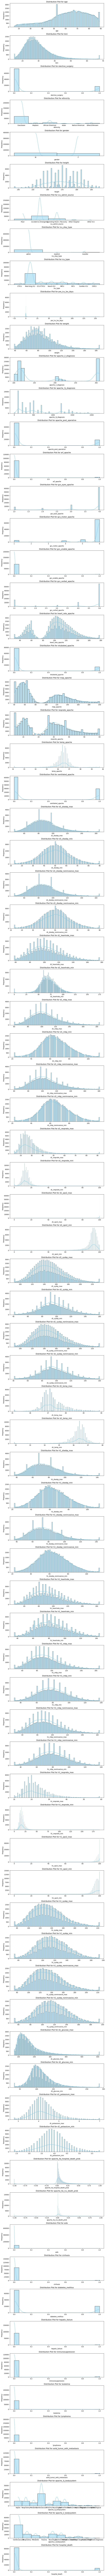

In [174]:
# Set up a grid of subplots for each column
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 3*len(df.columns)))

# Iterate through each column and create a distribution plot
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# Missing values


In [175]:
# Percentage of missing values
total = df.isnull().sum().sort_values(ascending=True)
percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=True)

missing_data = pd.concat([total, percentage], axis=1, keys=['total', 'percentage'])
missing_data


total  percentage
hospital_death                     0    0.000000
elective_surgery                   0    0.000000
icu_stay_type                      0    0.000000
icu_type                           0    0.000000
pre_icu_los_days                   0    0.000000
apache_post_operative              0    0.000000
gender                            25    0.000273
icu_admit_source                 112    0.001221
d1_heartrate_min                 145    0.001581
d1_heartrate_max                 145    0.001581
d1_sysbp_min                     159    0.001734
d1_sysbp_max                     159    0.001734
d1_diasbp_min                    165    0.001799
d1_diasbp_max                    165    0.001799
d1_mbp_max                       220    0.002399
d1_mbp_min                       220    0.002399
d1_spo2_min                      333    0.003631
d1_spo2_max                      333    0.003631
d1_resprate_max                  385    0.004198
d1_resprate_min                  385    0.004198
leukemia                         715    0.007796
lymphoma                         715    0.007796
aids                             715    0.007796
cirrhosis                        715    0.007796
diabetes_mellitus                715    0.007796
arf_apache                       715    0.007796
intubated_apache                 715    0.007796
hepatic_failure                  715    0.007796
solid_tumor_with_metastasis      715    0.007796
immunosuppression                715    0.007796
ventilated_apache                715    0.007796
heart_rate_apache                878    0.009573
map_apache                       994    0.010838
d1_sysbp_noninvasive_max        1027    0.011198
d1_sysbp_noninvasive_min        1027    0.011198
gcs_unable_apache               1037    0.011307
d1_diasbp_noninvasive_min       1040    0.011340
d1_diasbp_noninvasive_max       1040    0.011340
apache_3j_diagnosis             1101    0.012005
resprate_apache                 1234    0.013455
height                          1334    0.014545
ethnicity                       1395    0.015210
d1_mbp_noninvasive_min          1479    0.016126
d1_mbp_noninvasive_max          1479    0.016126
apache_2_diagnosis              1662    0.018122
apache_2_bodysystem             1662    0.018122
apache_3j_bodysystem            1662    0.018122
gcs_verbal_apache               1901    0.020728
gcs_motor_apache                1901    0.020728
gcs_eyes_apache                 1901    0.020728
d1_temp_max                     2324    0.025340
d1_temp_min                     2324    0.025340
weight                          2720    0.029658
h1_heartrate_max                2790    0.030421
h1_heartrate_min                2790    0.030421
bmi                             3429    0.037388
h1_sysbp_min                    3611    0.039373
h1_sysbp_max                    3611    0.039373
h1_diasbp_max                   3619    0.039460
h1_diasbp_min                   3619    0.039460
temp_apache                     4108    0.044792
h1_spo2_max                     4185    0.045631
h1_spo2_min                     4185    0.045631
age                             4228    0.046100
h1_resprate_min                 4357    0.047507
h1_resprate_max                 4357    0.047507
h1_mbp_min                      4639    0.050582
h1_mbp_max                      4639    0.050582
d1_glucose_min                  5807    0.063317
d1_glucose_max                  5807    0.063317
h1_sysbp_noninvasive_min        7341    0.080043
h1_sysbp_noninvasive_max        7341    0.080043
h1_diasbp_noninvasive_min       7350    0.080141
h1_diasbp_noninvasive_max       7350    0.080141
apache_4a_hospital_death_prob   7947    0.086651
apache_4a_icu_death_prob        7947    0.086651
h1_mbp_noninvasive_min          9084    0.099048
h1_mbp_noninvasive_max          9084    0.099048
d1_potassium_max                9585    0.104511
d1_potassium_min                9585    0.104511

# checking negitive values 

In [176]:
df_num = df.select_dtypes(include = np.number)
df_num.head()

age       bmi  elective_surgery     height  pre_icu_los_days  \
0 68.000000 22.730000                 0 180.300000          0.541667   
1 77.000000 27.420000                 0 160.000000          0.927778   
2 25.000000 31.950000                 0 172.700000          0.000694   
3 81.000000 22.640000                 1 165.100000          0.000694   
4 19.000000       NaN                 0 188.000000          0.073611   

     weight  apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
0 73.900000          113.000000           502.010000                      0   
1 70.200000          108.000000           203.010000                      0   
2 95.300000          122.000000           703.030000                      0   
3 61.700000          203.000000          1206.030000                      1   
4       NaN          119.000000           601.010000                      0   

   arf_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0    0.000000         3.000000          6.000000           0.000000   
1    0.000000         1.000000          3.000000           0.000000   
2    0.000000         3.000000          6.000000           0.000000   
3    0.000000         4.000000          6.000000           0.000000   
4    0.000000              NaN               NaN                NaN   

   gcs_verbal_apache  heart_rate_apache  intubated_apache  map_apache  \
0           4.000000         118.000000          0.000000   40.000000   
1           1.000000         120.000000          0.000000   46.000000   
2           5.000000         102.000000          0.000000   68.000000   
3           5.000000         114.000000          1.000000   60.000000   
4                NaN          60.000000          0.000000  103.000000   

   resprate_apache  temp_apache  ventilated_apache  d1_diasbp_max  \
0        36.000000    39.300000           0.000000      68.000000   
1        33.000000    35.100000           1.000000      95.000000   
2        37.000000    36.700000           0.000000      88.000000   
3         4.000000    34.800000           1.000000      48.000000   
4        16.000000    36.700000           0.000000      99.000000   

   d1_diasbp_min  d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  \
0      37.000000                  68.000000                  37.000000   
1      31.000000                  95.000000                  31.000000   
2      48.000000                  88.000000                  48.000000   
3      42.000000                  48.000000                  42.000000   
4      57.000000                  99.000000                  57.000000   

   d1_heartrate_max  d1_heartrate_min  d1_mbp_max  d1_mbp_min  \
0        119.000000         72.000000   89.000000   46.000000   
1        118.000000         72.000000  120.000000   38.000000   
2         96.000000         68.000000  102.000000   68.000000   
3        116.000000         92.000000   84.000000   84.000000   
4         89.000000         60.000000  104.000000   90.000000   

   d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  d1_resprate_max  \
0               89.000000               46.000000        34.000000   
1              120.000000               38.000000        32.000000   
2              102.000000               68.000000        21.000000   
3               84.000000               84.000000        23.000000   
4              104.000000               90.000000        18.000000   

   d1_resprate_min  d1_spo2_max  d1_spo2_min  d1_sysbp_max  d1_sysbp_min  \
0        10.000000   100.000000    74.000000    131.000000     73.000000   
1        12.000000   100.000000    70.000000    159.000000     67.000000   
2         8.000000    98.000000    91.000000    148.000000    105.000000   
3         7.000000   100.000000    95.000000    158.000000     84.000000   
4        16.000000   100.000000    96.000000    147.000000    120.000000   

   d1_sysbp_noninvasive_max  d1_sysbp_noninvasive_min  d1_temp_max  \
0                131.000000        

In [177]:
for col in df_num.columns:
    df_num.loc[df_num[col] < 0, col] = np.nan

# Missing values treatment with KNN imputer 

In [178]:
from sklearn.impute import KNNImputer

In [179]:
X=np.array(df_num)

In [180]:
imputer = KNNImputer(n_neighbors=5)
imputed_dataset = pd.DataFrame(imputer.fit_transform(X),columns=df_num.columns)

In [181]:
imputed_dataset.isnull().sum()

age                              0
bmi                              0
elective_surgery                 0
height                           0
pre_icu_los_days                 0
weight                           0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
heart_rate_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
temp_apache                      0
ventilated_apache                0
d1_diasbp_max                    0
d1_diasbp_min                    0
d1_diasbp_noninvasive_max        0
d1_diasbp_noninvasive_min        0
d1_heartrate_max                 0
d1_heartrate_min                 0
d1_mbp_max                       0
d1_mbp_min                       0
d1_mbp_noninvasive_m

# Missing values of categorical columns 

In [182]:
df_cat = df.select_dtypes(include = object)
df_cat.head()

ethnicity gender           icu_admit_source icu_stay_type      icu_type  \
0  Caucasian      M                      Floor         admit         CTICU   
1  Caucasian      F                      Floor         admit  Med-Surg ICU   
2  Caucasian      F       Accident & Emergency         admit  Med-Surg ICU   
3  Caucasian      F  Operating Room / Recovery         admit         CTICU   
4  Caucasian      M       Accident & Emergency         admit  Med-Surg ICU   

  apache_3j_bodysystem apache_2_bodysystem  
0               Sepsis      Cardiovascular  
1          Respiratory         Respiratory  
2            Metabolic           Metabolic  
3       Cardiovascular      Cardiovascular  
4               Trauma              Trauma

In [183]:
df_cat.isnull().sum()

ethnicity               1395
gender                    25
icu_admit_source         112
icu_stay_type              0
icu_type                   0
apache_3j_bodysystem    1662
apache_2_bodysystem     1662
dtype: int64

In [184]:
for i in df_cat.columns:
    df_cat[i].fillna(df_cat[i].mode()[0],inplace=True,axis=0)
df_cat.isnull().sum()

ethnicity               0
gender                  0
icu_admit_source        0
icu_stay_type           0
icu_type                0
apache_3j_bodysystem    0
apache_2_bodysystem     0
dtype: int64

# Treating missing values with mode imputation

In [185]:
for i in df_cat:
    df_cat[i].fillna(df_cat[i].mode()[0],inplace=True,axis=0)
df_cat.isnull().sum()

ethnicity               0
gender                  0
icu_admit_source        0
icu_stay_type           0
icu_type                0
apache_3j_bodysystem    0
apache_2_bodysystem     0
dtype: int64

# Bining categorical values 

In [186]:
for i in df_cat.columns:
    print(i)
    print((df_cat[i].value_counts()/len(df_cat[i])*100))
    print('_'*75)

ethnicity
Caucasian          78.591912
African American   10.409647
Other/Unknown       4.769226
Hispanic            4.138999
Asian               1.231014
Native American     0.859202
Name: ethnicity, dtype: float64
___________________________________________________________________________
gender
M   53.966177
F   46.033823
Name: gender, dtype: float64
___________________________________________________________________________
icu_admit_source
Accident & Emergency        59.066872
Operating Room / Recovery   20.403869
Floor                       17.021578
Other Hospital               2.571064
Other ICU                    0.936617
Name: icu_admit_source, dtype: float64
___________________________________________________________________________
icu_stay_type
admit      93.970320
transfer    5.419079
readmit     0.610600
Name: icu_stay_type, dtype: float64
___________________________________________________________________________
icu_type
Med-Surg ICU   55.156848
MICU            8.39030

In [187]:
df_cat['ethnicity']=df_cat['ethnicity'].replace(['Other/Unknown','Hispanic','Asian','Native American'],'Other')
df_cat['icu_admit_source']=df_cat['icu_admit_source'].replace(['Other Hospital','Other ICU'],'Other')
df_cat['apache_3j_bodysystem']=df_cat['apache_3j_bodysystem'].replace(['Genitourinary','Musculoskeletal/Skin','Hematological','Gynecological'],'Other')
df_cat['apache_2_bodysystem']=df_cat['apache_2_bodysystem'].replace(['Undefined diagnoses'],'Undefined Diagnoses')
df_cat['apache_2_bodysystem']=df_cat['apache_2_bodysystem'].replace(['Renal/Genitourinary','Haematologic'],'Other')

In [188]:
for i in df_cat.columns:
    print(i)
    print((df_cat[i].value_counts()/len(df_cat[i])*100))
    print('_'*75)

ethnicity
Caucasian          78.591912
Other              10.998441
African American   10.409647
Name: ethnicity, dtype: float64
___________________________________________________________________________
gender
M   53.966177
F   46.033823
Name: gender, dtype: float64
___________________________________________________________________________
icu_admit_source
Accident & Emergency        59.066872
Operating Room / Recovery   20.403869
Floor                       17.021578
Other                        3.507682
Name: icu_admit_source, dtype: float64
___________________________________________________________________________
icu_stay_type
admit      93.970320
transfer    5.419079
readmit     0.610600
Name: icu_stay_type, dtype: float64
___________________________________________________________________________
icu_type
Med-Surg ICU   55.156848
MICU            8.390305
Neuro ICU       8.368497
CCU-CTICU       7.802602
SICU            5.679675
Cardiac ICU     5.207550
CSICU           5.02982

In [189]:
df_cat.columns

Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem'],
      dtype='object')

In [190]:
df_cat.head()

ethnicity gender           icu_admit_source icu_stay_type      icu_type  \
0  Caucasian      M                      Floor         admit         CTICU   
1  Caucasian      F                      Floor         admit  Med-Surg ICU   
2  Caucasian      F       Accident & Emergency         admit  Med-Surg ICU   
3  Caucasian      F  Operating Room / Recovery         admit         CTICU   
4  Caucasian      M       Accident & Emergency         admit  Med-Surg ICU   

  apache_3j_bodysystem apache_2_bodysystem  
0               Sepsis      Cardiovascular  
1          Respiratory         Respiratory  
2            Metabolic           Metabolic  
3       Cardiovascular      Cardiovascular  
4               Trauma              Trauma

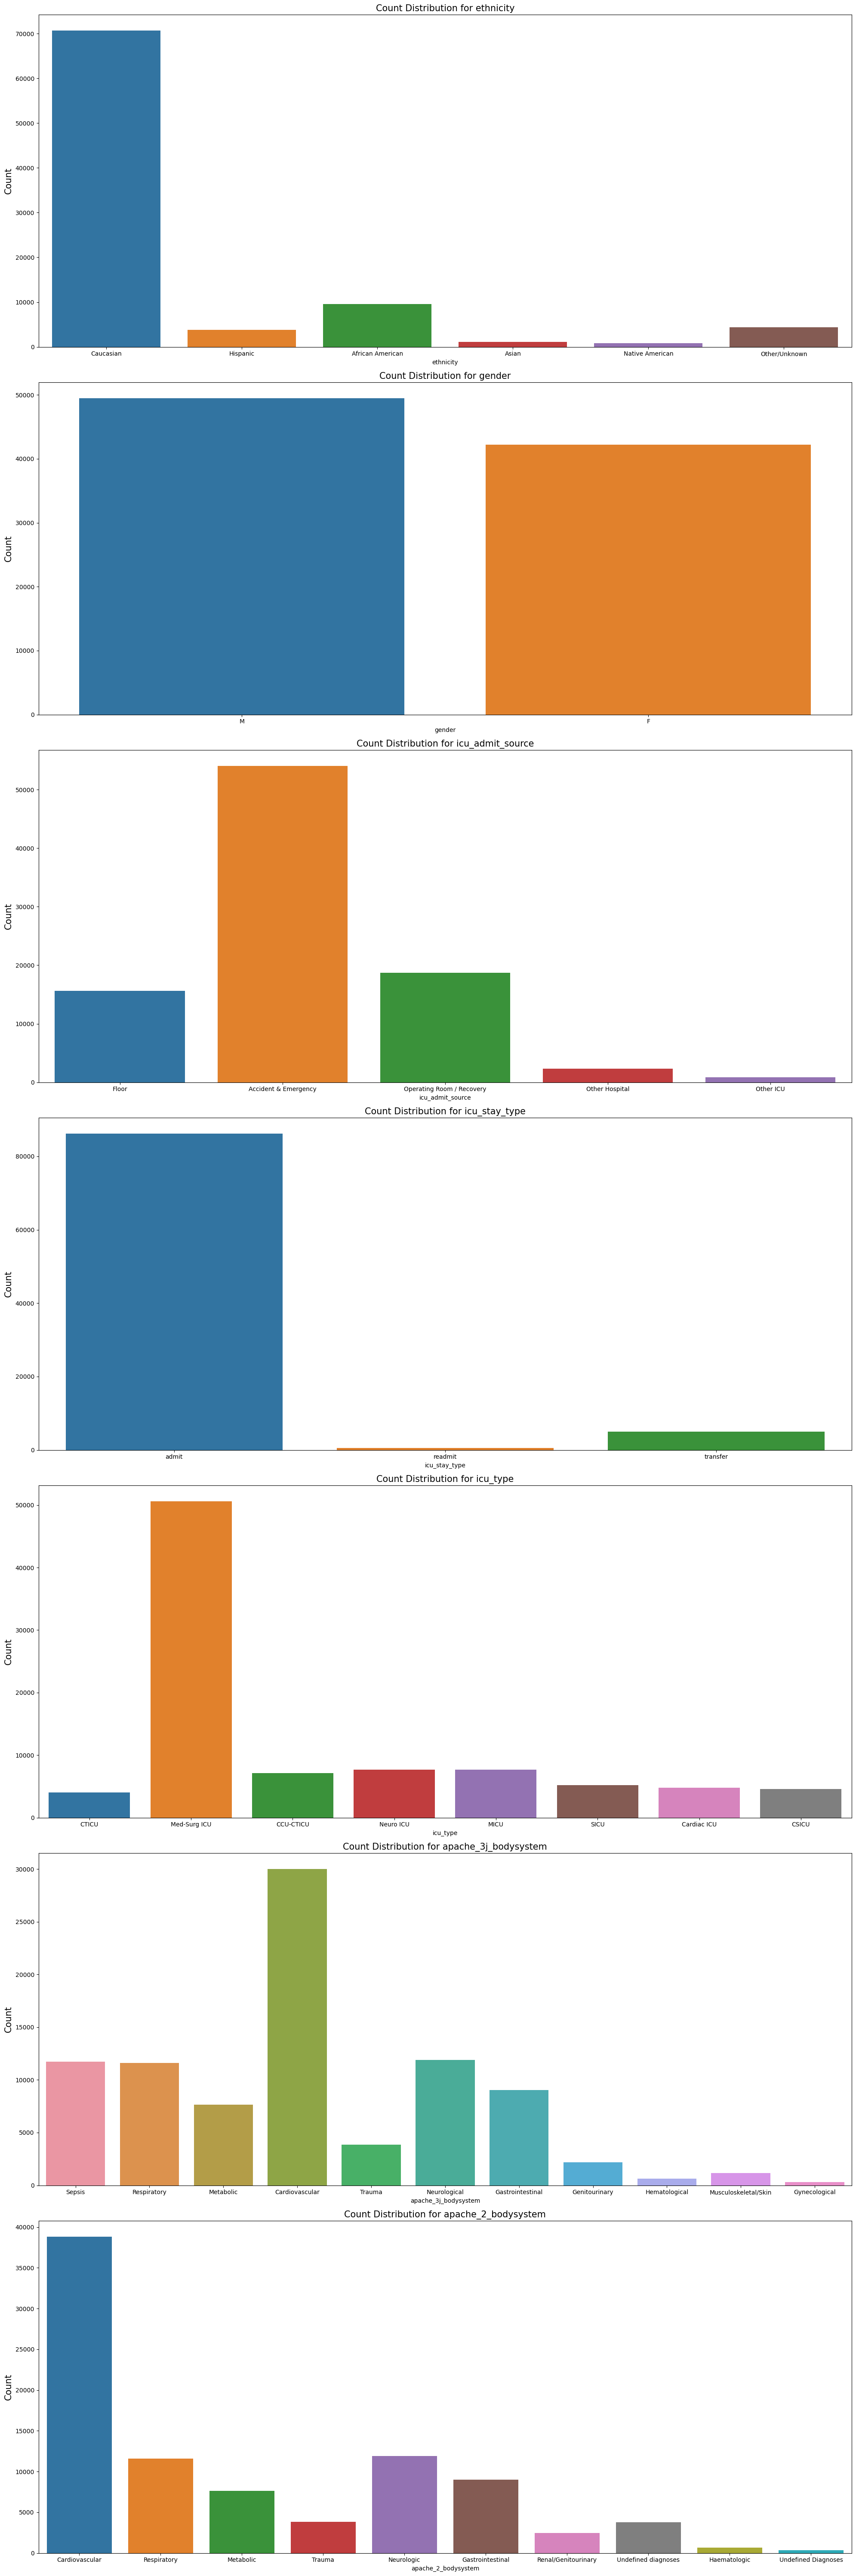

In [191]:
# Select categorical columns
df_cat = df.select_dtypes(include=['object']).columns

# Set the number of subplots based on the number of categorical variables
fig, ax = plt.subplots(len(df_cat), 1, figsize=(20,60))


# Plot a count plot for all the categorical variables
for variable, subplot in zip(df_cat, ax):
    # Plot the count plot using countplot()
    countplot = sns.countplot(x=df[variable], ax=subplot)
    
    # Set the y-axis label for each subplot
    subplot.set_ylabel('Count', fontsize=15)
    
    # Set the title for each subplot
    subplot.set_title(f'Count Distribution for {variable}', fontsize=15)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

# Get dummies encoding  

In [192]:
imputed_dataset.shape

(91713, 73)

In [193]:
df_cat_dum=pd.get_dummies(df_cat,drop_first=True)
df_cat_dum.shape

(7, 6)

In [194]:
df_cat_dum.columns

Index(['apache_3j_bodysystem', 'ethnicity', 'gender', 'icu_admit_source',
       'icu_stay_type', 'icu_type'],
      dtype='object')

In [195]:
# Concatenate the imputed numerical and categorical DataFrames back
df= pd.concat([imputed_dataset, df_cat_dum], axis=1)


In [196]:
df.shape

(91713, 79)

In [197]:
df.isnull().sum()

age                                  0
bmi                                  0
elective_surgery                     0
height                               0
pre_icu_los_days                     0
weight                               0
apache_2_diagnosis                   0
apache_3j_diagnosis                  0
apache_post_operative                0
arf_apache                           0
gcs_eyes_apache                      0
gcs_motor_apache                     0
gcs_unable_apache                    0
gcs_verbal_apache                    0
heart_rate_apache                    0
intubated_apache                     0
map_apache                           0
resprate_apache                      0
temp_apache                          0
ventilated_apache                    0
d1_diasbp_max                        0
d1_diasbp_min                        0
d1_diasbp_noninvasive_max            0
d1_diasbp_noninvasive_min            0
d1_heartrate_max                     0
d1_heartrate_min         

# summarize data 

In [198]:
df.describe()

age          bmi  elective_surgery       height  \
count 91713.000000 91713.000000      91713.000000 91713.000000   
mean     62.031995    29.207662          0.183736   169.656893   
std      16.537732     8.161114          0.387271    10.729814   
min      16.000000    14.844926          0.000000   137.200000   
25%      52.000000    23.738987          0.000000   162.560000   
50%      64.000000    27.773438          0.000000   170.100000   
75%      75.000000    32.902456          0.000000   177.800000   
max      89.000000    67.814990          1.000000   195.590000   

       pre_icu_los_days       weight  apache_2_diagnosis  apache_3j_diagnosis  \
count      91713.000000 91713.000000        91713.000000         91713.000000   
mean           0.858275    84.073087          185.573371           559.244369   
std            2.485263    24.762437           85.524438           461.394482   
min            0.000000    38.600000          101.000000             0.010000   
25%            0.038194    67.100000          113.000000           203.010000   
50%            0.143750    80.500000          123.000000           409.020000   
75%            0.431250    97.154000          301.000000           703.030000   
max          159.090972   186.000000          308.000000          2201.050000   

       apache_post_operative   arf_apache  gcs_eyes_apache  gcs_motor_apache  \
count           91713.000000 91713.000000     91713.000000      91713.000000   
mean                0.201106     0.027761         3.467999          5.472766   
std                 0.400829     0.164287         0.944017          1.278155   
min                 0.000000     0.000000         1.000000          1.000000   
25%                 0.000000     0.000000         3.000000          6.000000   
50%                 0.000000     0.000000         4.000000          6.000000   
75%                 0.000000     0.000000         4.000000          6.000000   
max                 1.000000     1.000000         4.000000          6.000000   

       gcs_unable_apache  gcs_verbal_apache  heart_rate_apache  \
count       91713.000000       91713.000000       91713.000000   
mean            0.009451           4.001393          99.679897   
std             0.096631           1.547875          30.776405   
min             0.000000           1.000000          30.000000   
25%             0.000000           4.000000          86.000000   
50%             0.000000           5.000000         104.000000   
75%             0.000000           5.000000         120.000000   
max             1.000000           5.000000         178.000000   

       intubated_apache   map_apache  resprate_apache  temp_apache  \
count      91713.000000 91713.000000     91713.000000 91713.000000   
mean           0.150049    88.012951        25.782624    36.419877   
std            0.357117    41.877452        15.028650     0.817562   
min            0.000000    40.000000         4.000000    32.100000   
25%            0.000000    54.000000        11.000000    36.200000   
50%            0.000000    67.000000        28.000000    36.500000   
75%            0.000000   124.000000        36.000000    36.700000   
max            1.000000   200.000000        60.000000    39.700000   

       ventilated_apache  d1_diasbp_max  d1_diasbp_min  \
count       91713.000000   91713.000000   91713.000000   
mean            0.323671      88.493472      50.169309   
std             0.467477      19.785721      13.310944   
min             0.000000      46.000000      13.000000   
25%             0.000000      75.000000      42.000000   
50%             0.000000      86.000000      50.000000   
75%             1.000000      99.000000      58.000000   
max             1.000000     165.000000      90.000000   

       d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  d1_heartrate_max  \
count               91713.000000               91713.000000      91713.000000   
mean                   88.519379                  50.23937

# Skewness 

In [199]:
import scipy.stats as stats

df.skew()

age                              -0.588231
bmi                               1.441900
elective_surgery                  1.633330
height                           -0.105117
pre_icu_los_days                 11.020581
weight                            1.066521
apache_2_diagnosis                0.502288
apache_3j_diagnosis               1.008283
apache_post_operative             1.491413
arf_apache                        5.749089
gcs_eyes_apache                  -1.699777
gcs_motor_apache                 -2.727151
gcs_unable_apache                10.148081
gcs_verbal_apache                -1.218912
heart_rate_apache                -0.265884
intubated_apache                  1.959897
map_apache                        0.699543
resprate_apache                   0.264100
temp_apache                      -0.996672
ventilated_apache                 0.754783
d1_diasbp_max                     0.814084
d1_diasbp_min                     0.092497
d1_diasbp_noninvasive_max         0.816955
d1_diasbp_n

# Skewness treatment 

In [200]:
from scipy.stats import yeojohnson
import numpy as np

# Example data
#data = np.array([1, 2, 3, 4, 5])
trans_yj=pd.DataFrame()

# Apply Yeo-Johnson transformation
for i in imputed_dataset.columns:
    transformed_data, lambda_value = yeojohnson(np.array(imputed_dataset[i]))
    trans_yj[i]=pd.Series(transformed_data)

In [201]:
trans_yj.skew()

age                             -0.159881
bmi                             -0.008519
elective_surgery                 1.633330
height                          -0.013564
pre_icu_los_days                 0.730652
weight                          -0.000900
apache_2_diagnosis               0.279768
apache_3j_diagnosis             -0.022038
apache_post_operative            1.491413
arf_apache                       5.749089
gcs_eyes_apache                 -0.998770
gcs_motor_apache                -1.547744
gcs_unable_apache               10.073217
gcs_verbal_apache               -0.897583
heart_rate_apache               -0.101953
intubated_apache                 1.959820
map_apache                       0.111779
resprate_apache                 -0.142906
temp_apache                      0.281901
ventilated_apache                0.750278
d1_diasbp_max                   -0.001559
d1_diasbp_min                    0.026723
d1_diasbp_noninvasive_max       -0.001678
d1_diasbp_noninvasive_min        0

In [202]:
df_cat_dum.shape

(7, 6)

In [203]:
df_cat_dum.head()

apache_3j_bodysystem  ethnicity  gender  icu_admit_source  icu_stay_type  \
0                     0          1       0                 0              0   
1                     0          0       1                 0              0   
2                     0          0       0                 1              0   
3                     0          0       0                 0              1   
4                     0          0       0                 0              0   

   icu_type  
0         0  
1         0  
2         0  
3         0  
4         1

In [204]:
trans_yj.head()

age      bmi  elective_surgery      height  pre_icu_los_days  \
0  823.938524 1.536801         -0.000000 2538.865469          0.275964   
1 1016.630264 1.569041         -0.000000 2100.007550          0.341821   
2  154.333646 1.593278         -0.000000 2370.926589          0.000694   
3 1107.614766 1.536088          0.130187 2207.323595          0.000694   
4   98.252074 1.556422         -0.000000 2713.360033          0.065613   

    weight  apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
0 3.211516            0.979962            14.672122              -0.000000   
1 3.184260            0.979581            10.949220              -0.000000   
2 3.343816            0.980568            16.283822              -0.000000   
3 3.114977            0.983607            19.162236               0.144094   
4 3.269578            0.980376            15.516832              -0.000000   

   arf_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0   -0.000000       305.102433     115215.461592          -0.000000   
1   -0.000000         7.377397       2306.935384          -0.000000   
2   -0.000000       305.102433     115215.461592          -0.000000   
3   -0.000000      1003.736179     115215.461592          -0.000000   
4   -0.000000       305.102433      39233.609851          -0.000000   

   gcs_verbal_apache  heart_rate_apache  intubated_apache  map_apache  \
0          53.697039         286.115506         -0.000000    1.666810   
1           2.561181         292.043571         -0.000000    1.686700   
2          96.510502         239.529725         -0.000000    1.735741   
3          96.510502         274.327384          0.104805    1.721034   
4          35.557012         125.569226         -0.000000    1.778556   

   resprate_apache    temp_apache  ventilated_apache  d1_diasbp_max  \
0        10.055499 9643801.345580          -0.000000       3.539715   
1         9.560242 5702694.945133           0.272058       3.764652   
2        10.216048 7014342.364632          -0.000000       3.713654   
3         2.461591 5479989.830516           0.272058       3.299629   
4         6.195450 7014342.364632          -0.000000       3.792010   

   d1_diasbp_min  d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  \
0      30.771035                   3.510757                  31.341683   
1      26.057902                   3.731634                  26.512897   
2      39.286009                   3.681583                  40.078451   
3      34.659734                   3.274674                  35.329791   
4      46.154827                   3.758477                  47.136220   

   d1_heartrate_max  d1_heartrate_min  d1_mbp_max  d1_mbp_min  \
0          5.039753        117.469281    2.667263   25.771136   
1          5.030489        117.469281    2.756955   22.034640   
2          4.804694        110.080966    2.708995   35.453224   
3          5.011729        155.239999    2.649143   42.095169   
4          4.722204         95.491857    2.714826   44.518500   

   d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  d1_resprate_max  \
0                2.845674               26.441089         1.112776   
1                2.951170               22.572999         1.109897   
2                2.894623               36.491223         1.085577   
3                2.824490               43.404040         1.091529   
4                2.901482               45.929354         1.074489   

   d1_resprate_min                                        d1_spo2_max  \
0        10.248071 12390740140746673867592026349358214698624312995...   
1        12.323668 12390740140746673867592026349358214698624312995...   
2         8.178134 26656078875675533595807594765589583029892877375...   
3         7.145658 12390740140746673867592026349358214698624312995...   
4        16.488613 12390740140746673867592026349358214698624312995...   

           d1_spo2_min  d1_sysbp_max  d1_sysbp_min  d1_sysbp_noninvasive_max  \
0  517396144449.072083     

In [205]:
df=pd.concat([df_cat_dum,trans_yj],axis=1)
df.shape

(91713, 79)

# Checking Outliers 

In [206]:
df_num = df.select_dtypes(include = np.number)

apache_3j_bodysystem


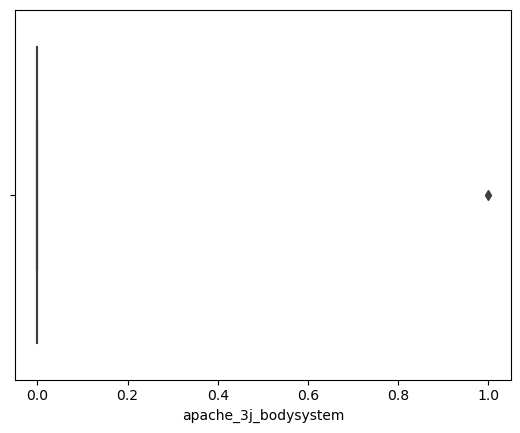

___________________________________________________________________________
ethnicity


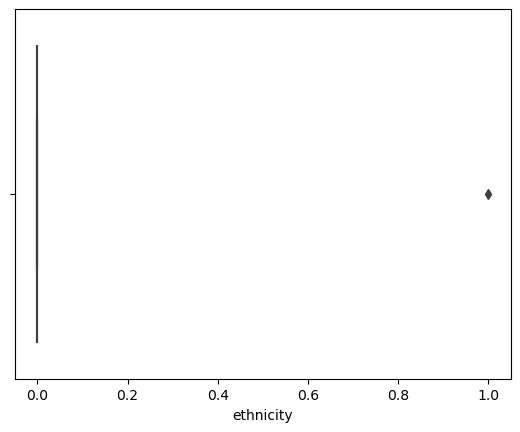

___________________________________________________________________________
gender


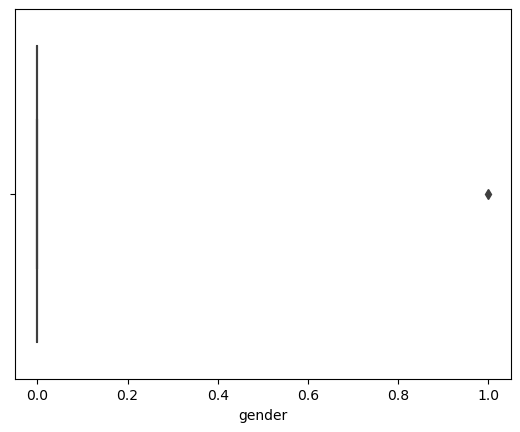

___________________________________________________________________________
icu_admit_source


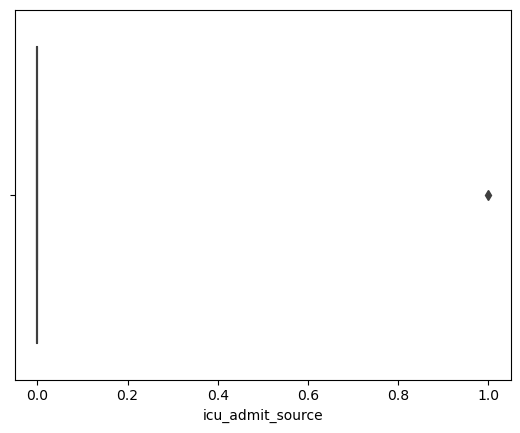

___________________________________________________________________________
icu_stay_type


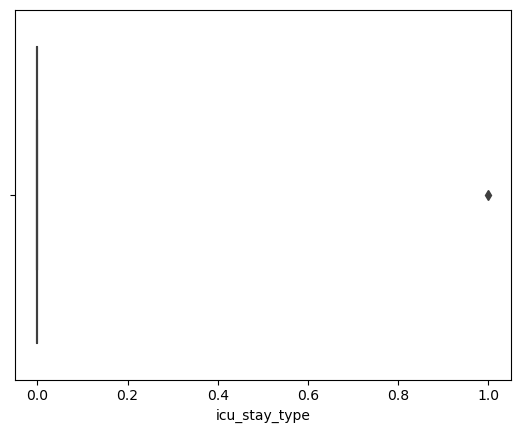

___________________________________________________________________________
icu_type


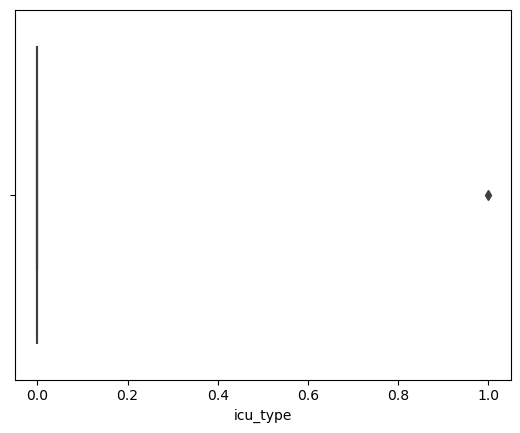

___________________________________________________________________________
age


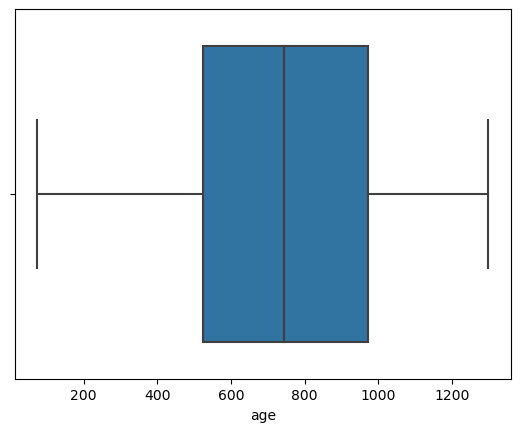

___________________________________________________________________________
bmi


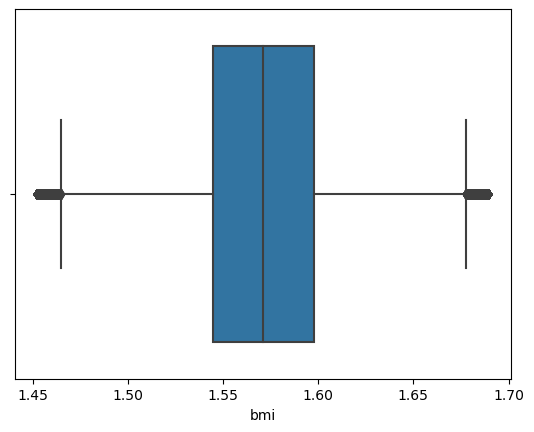

___________________________________________________________________________
elective_surgery


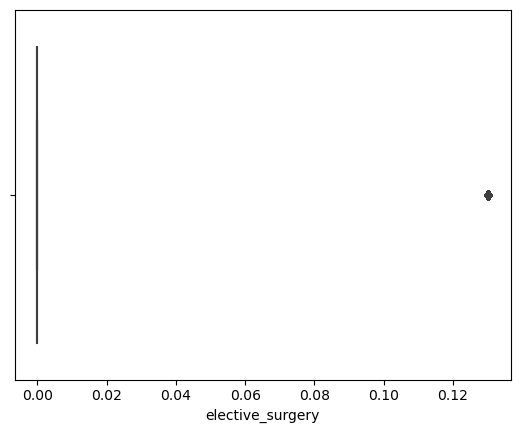

___________________________________________________________________________
height


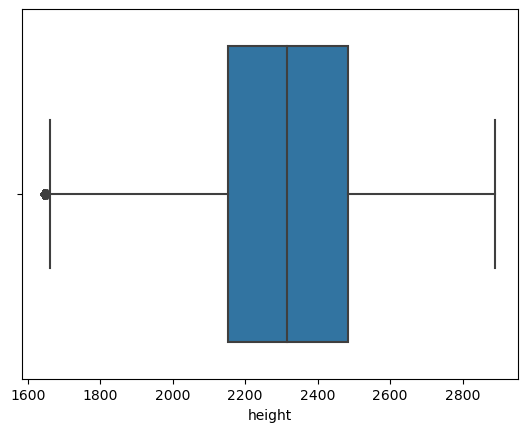

___________________________________________________________________________
pre_icu_los_days


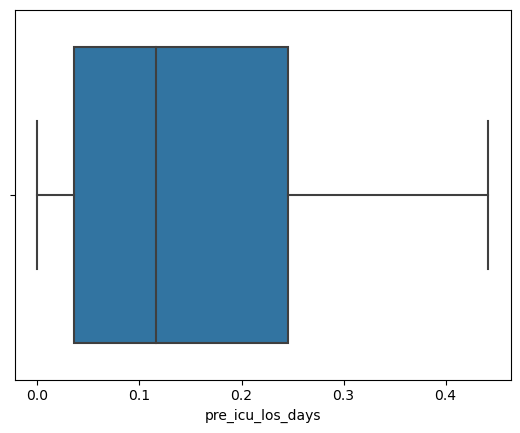

___________________________________________________________________________
weight


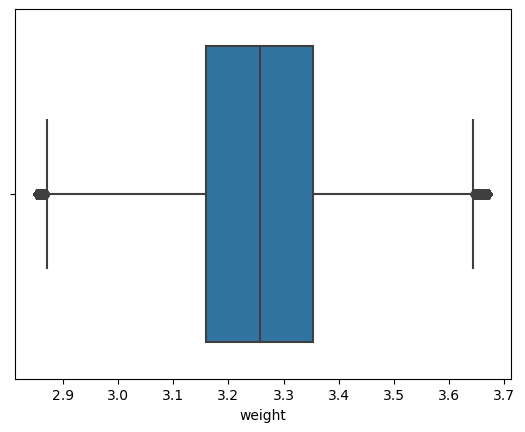

___________________________________________________________________________
apache_2_diagnosis


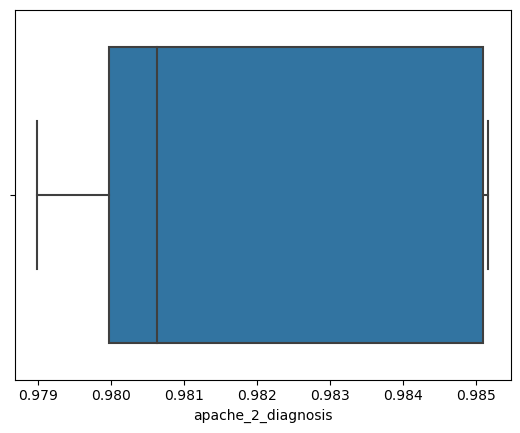

___________________________________________________________________________
apache_3j_diagnosis


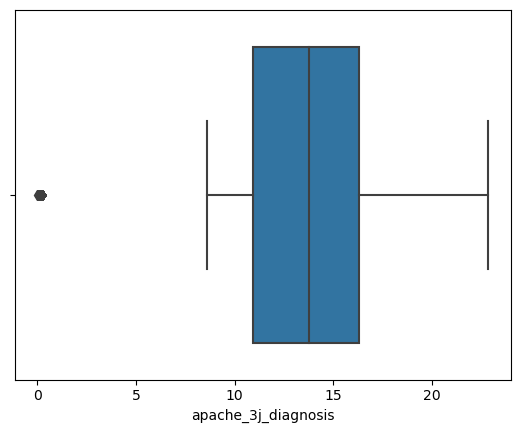

___________________________________________________________________________
apache_post_operative


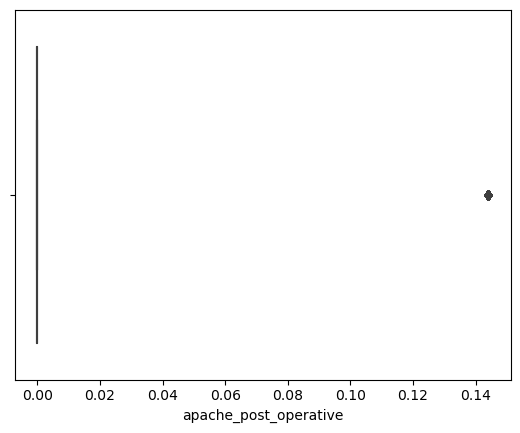

___________________________________________________________________________
arf_apache


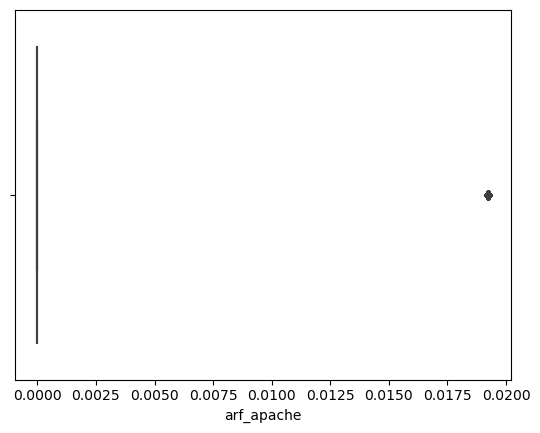

___________________________________________________________________________
gcs_eyes_apache


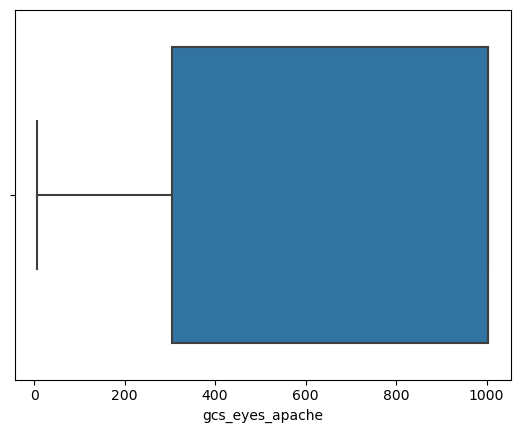

___________________________________________________________________________
gcs_motor_apache


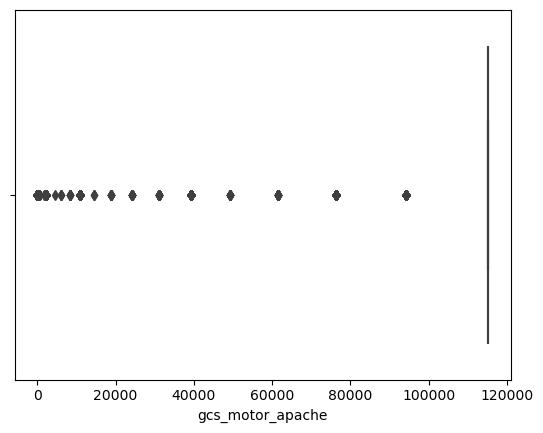

___________________________________________________________________________
gcs_unable_apache


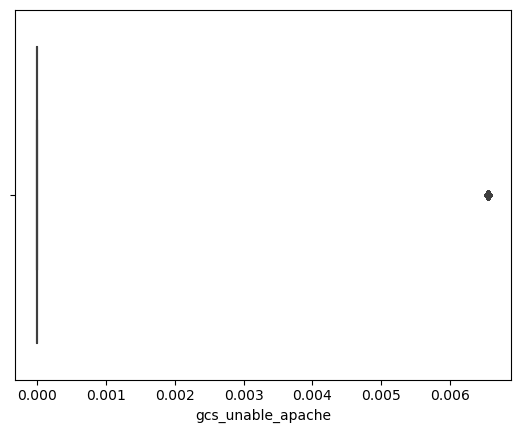

___________________________________________________________________________
gcs_verbal_apache


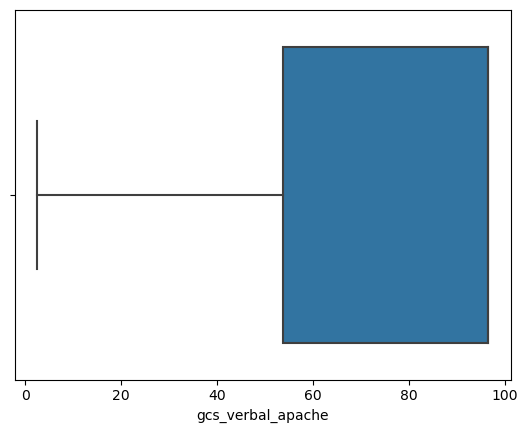

___________________________________________________________________________
heart_rate_apache


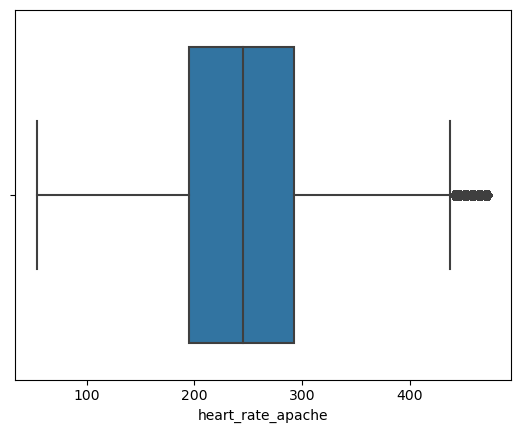

___________________________________________________________________________
intubated_apache


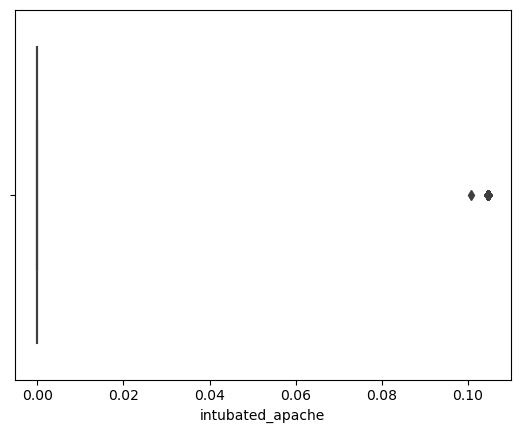

___________________________________________________________________________
map_apache


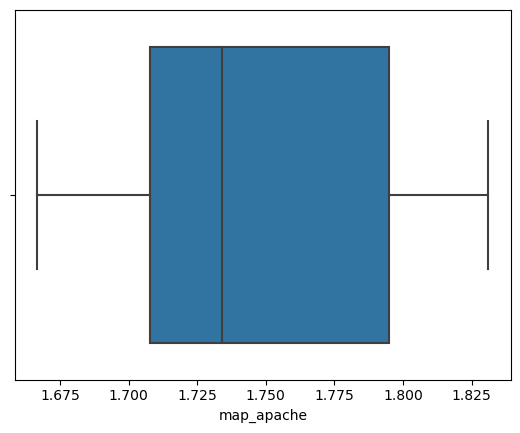

___________________________________________________________________________
resprate_apache


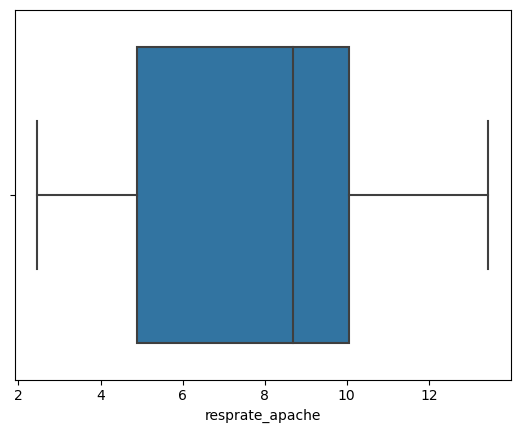

___________________________________________________________________________
temp_apache


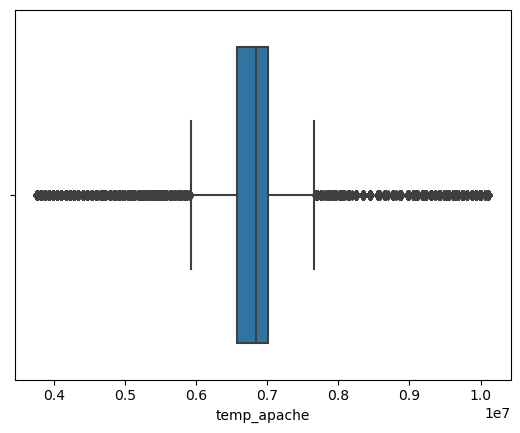

___________________________________________________________________________
ventilated_apache


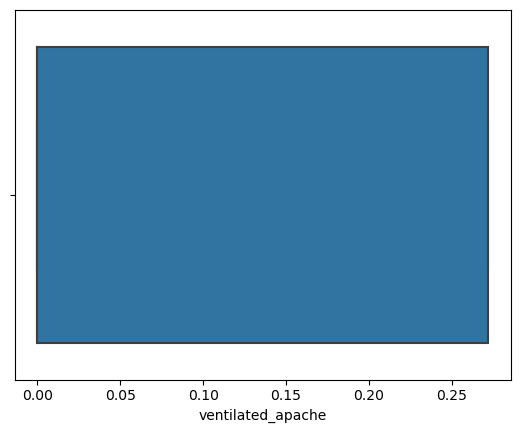

___________________________________________________________________________
d1_diasbp_max


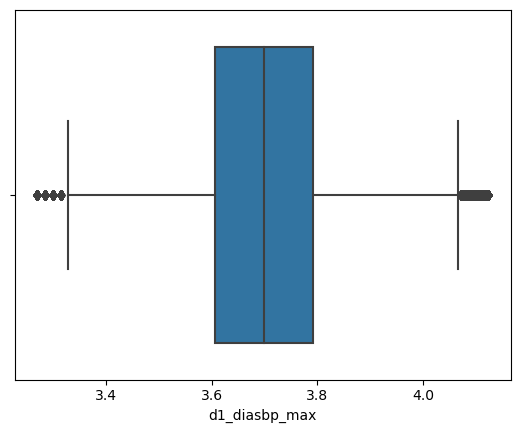

___________________________________________________________________________
d1_diasbp_min


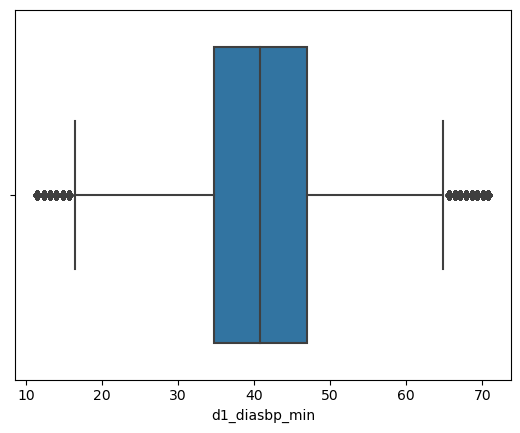

___________________________________________________________________________
d1_diasbp_noninvasive_max


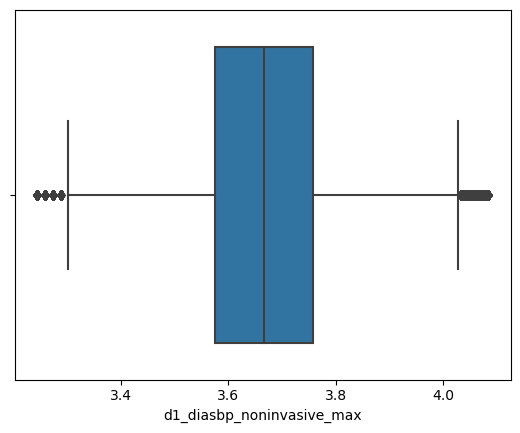

___________________________________________________________________________
d1_diasbp_noninvasive_min


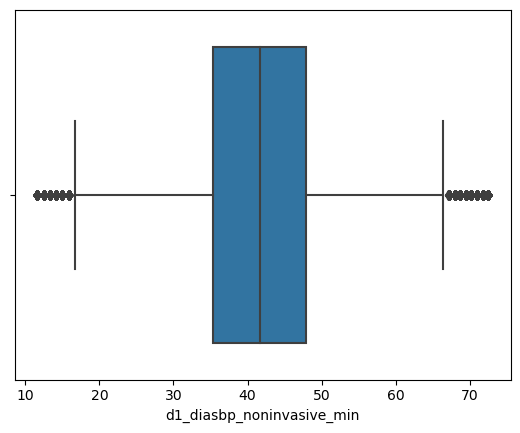

___________________________________________________________________________
d1_heartrate_max


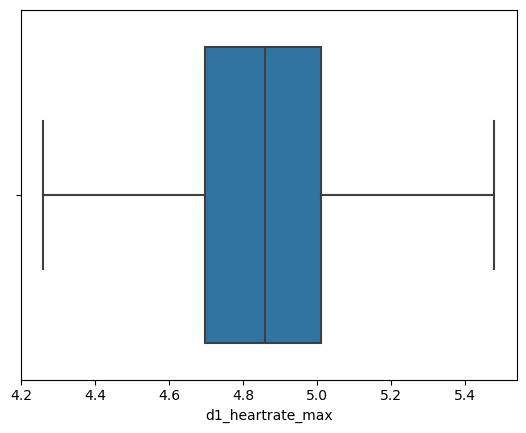

___________________________________________________________________________
d1_heartrate_min


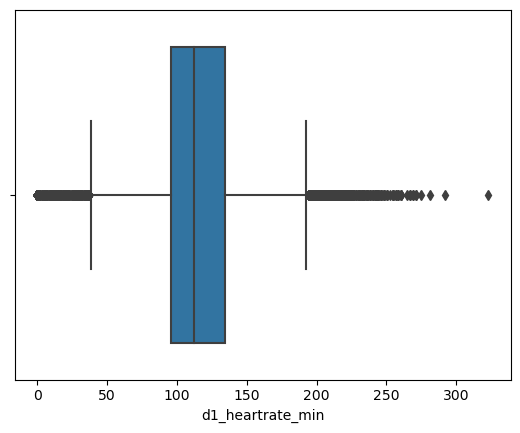

___________________________________________________________________________
d1_mbp_max


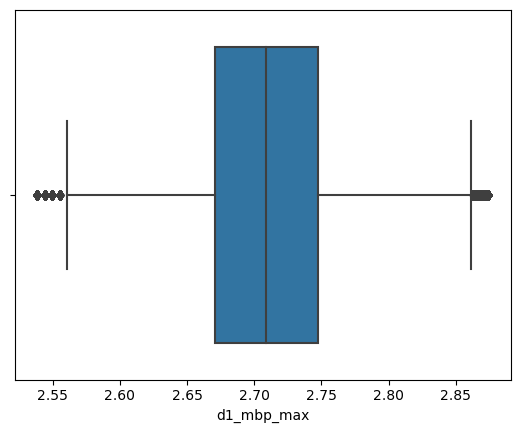

___________________________________________________________________________
d1_mbp_min


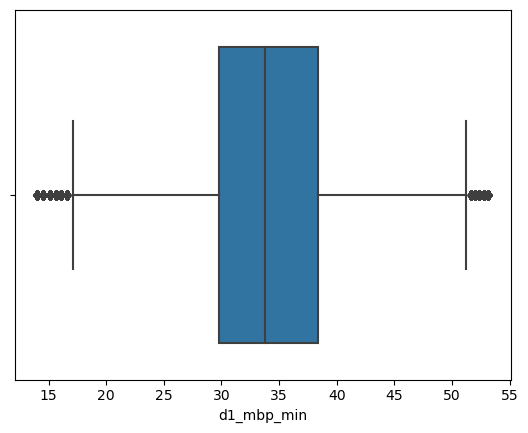

___________________________________________________________________________
d1_mbp_noninvasive_max


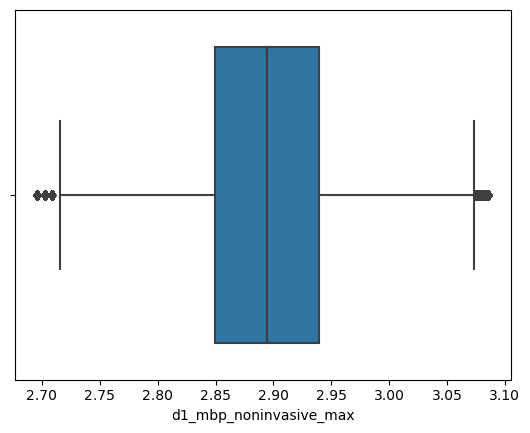

___________________________________________________________________________
d1_mbp_noninvasive_min


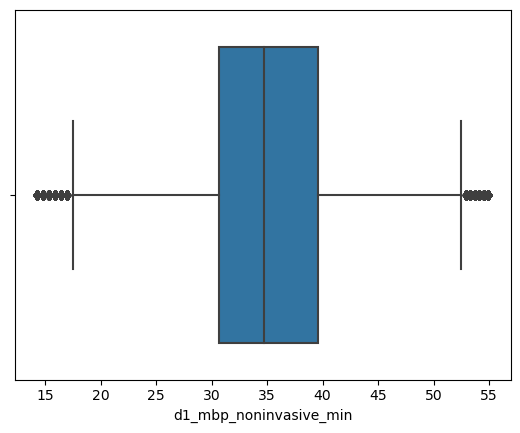

___________________________________________________________________________
d1_resprate_max


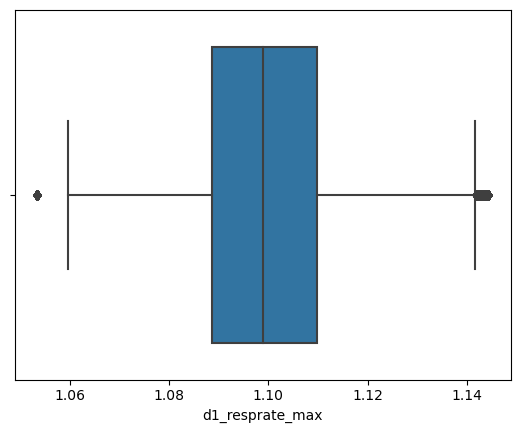

___________________________________________________________________________
d1_resprate_min


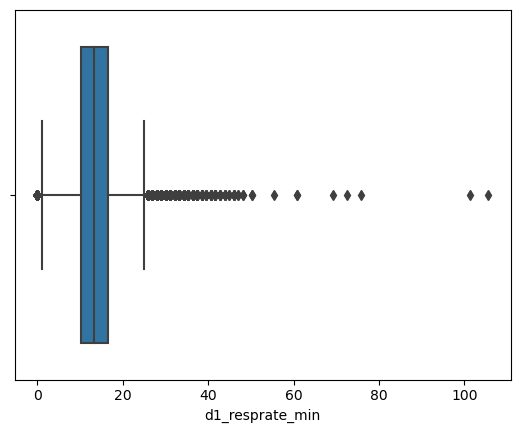

___________________________________________________________________________
d1_spo2_max


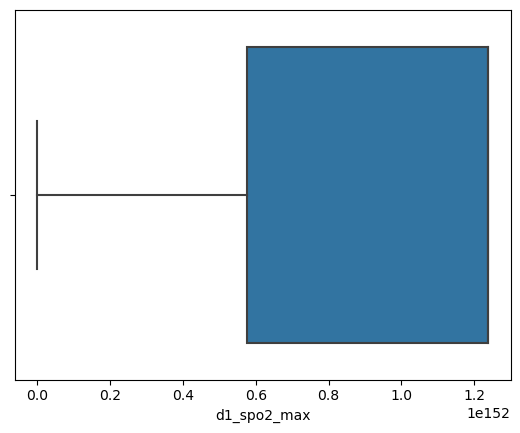

___________________________________________________________________________
d1_spo2_min


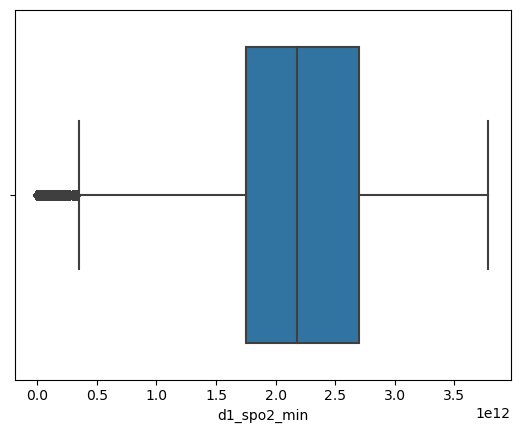

___________________________________________________________________________
d1_sysbp_max


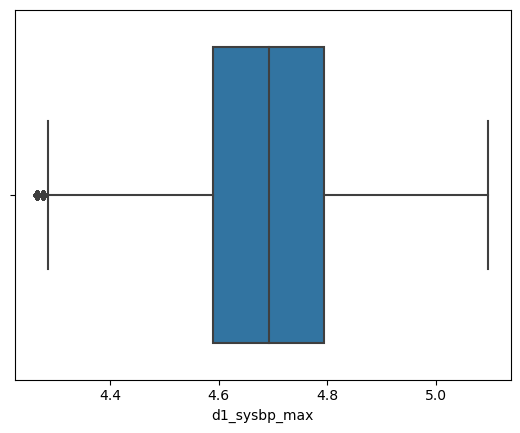

___________________________________________________________________________
d1_sysbp_min


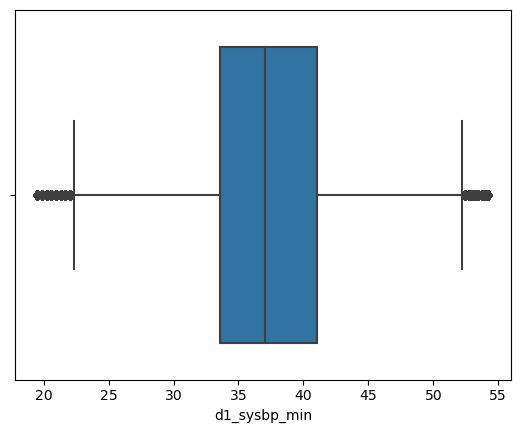

___________________________________________________________________________
d1_sysbp_noninvasive_max


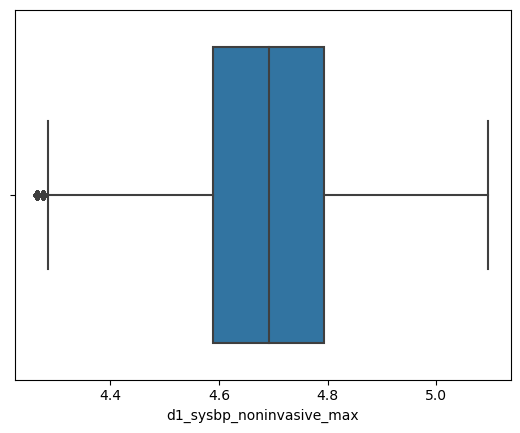

___________________________________________________________________________
d1_sysbp_noninvasive_min


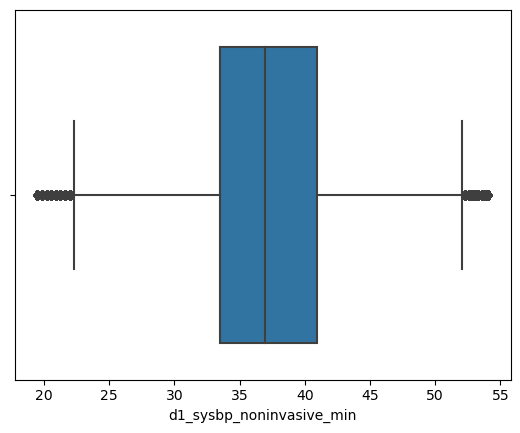

___________________________________________________________________________
d1_temp_max


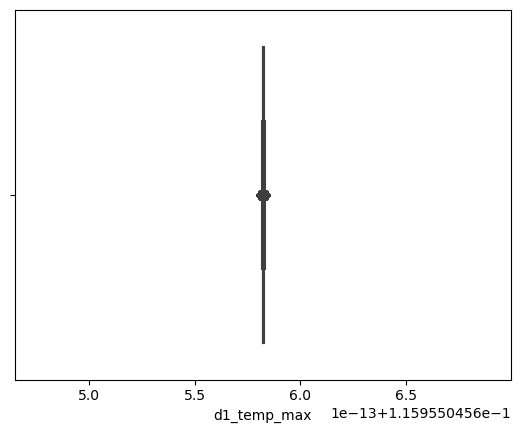

___________________________________________________________________________
d1_temp_min


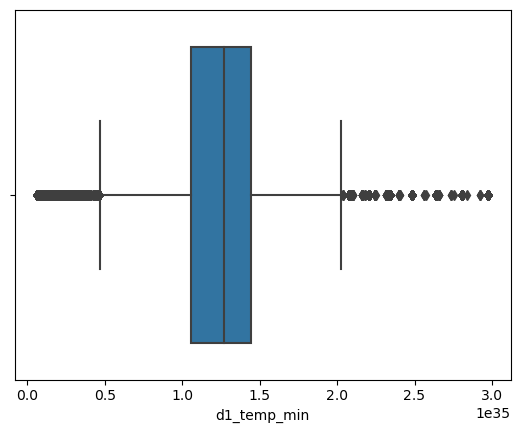

___________________________________________________________________________
h1_diasbp_max


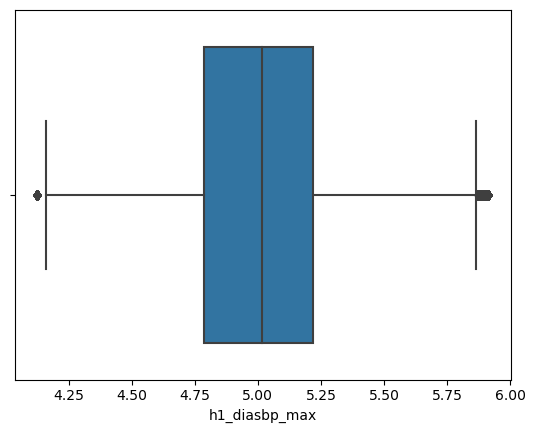

___________________________________________________________________________
h1_diasbp_min


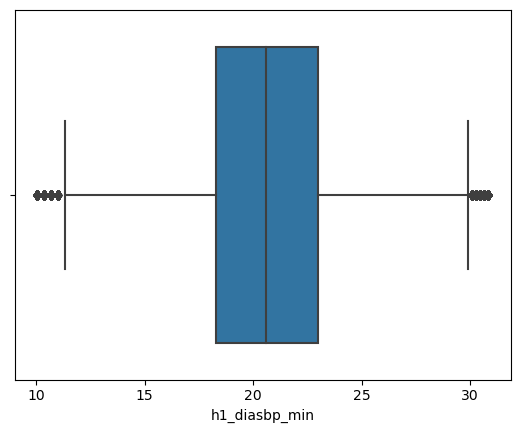

___________________________________________________________________________
h1_diasbp_noninvasive_max


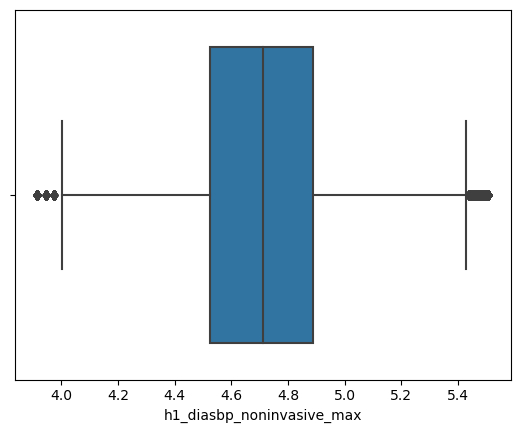

___________________________________________________________________________
h1_diasbp_noninvasive_min


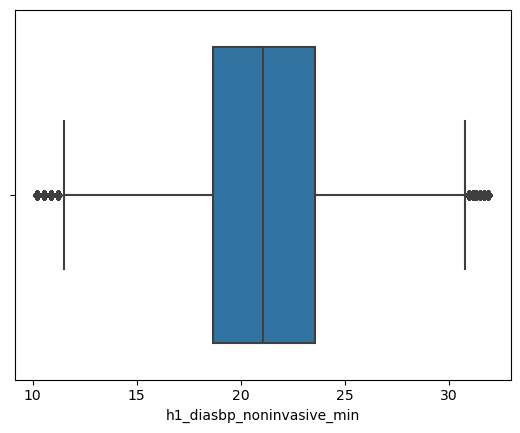

___________________________________________________________________________
h1_heartrate_max


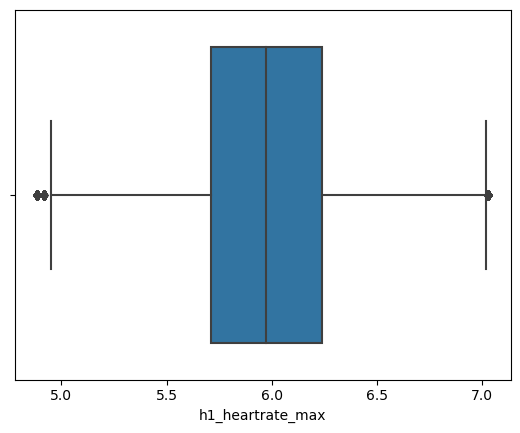

___________________________________________________________________________
h1_heartrate_min


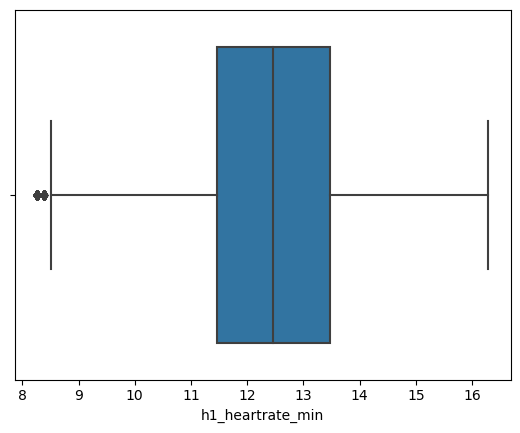

___________________________________________________________________________
h1_mbp_max


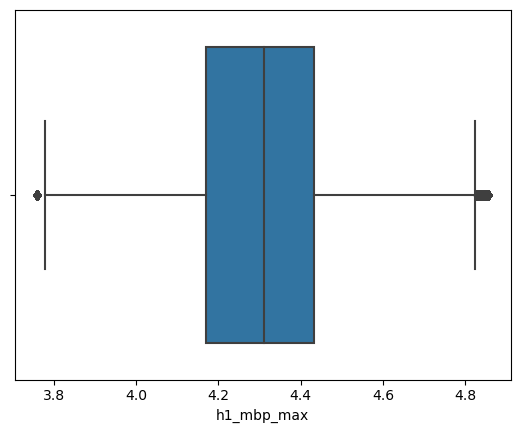

___________________________________________________________________________
h1_mbp_min


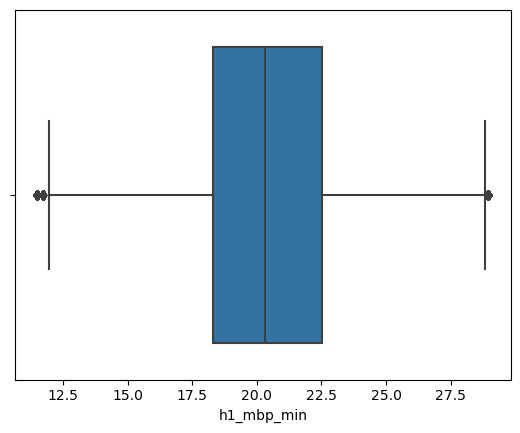

___________________________________________________________________________
h1_mbp_noninvasive_max


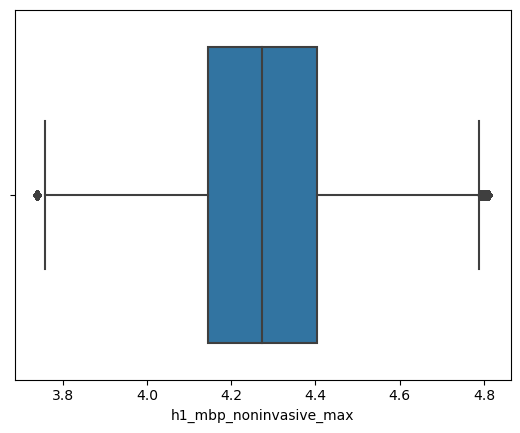

___________________________________________________________________________
h1_mbp_noninvasive_min


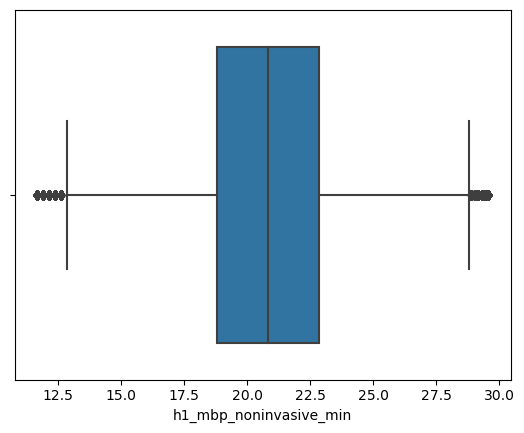

___________________________________________________________________________
h1_resprate_max


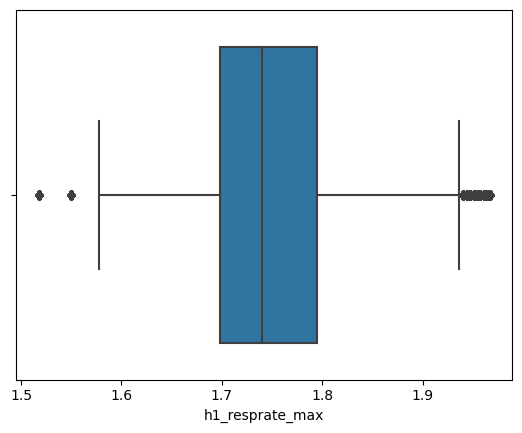

___________________________________________________________________________
h1_resprate_min


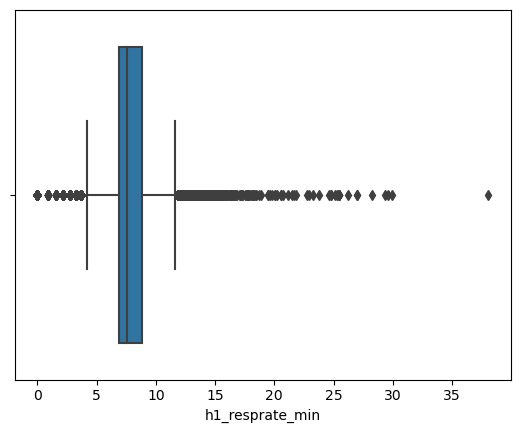

___________________________________________________________________________
h1_spo2_max


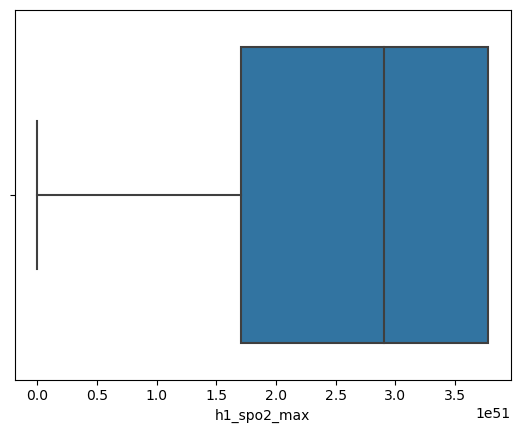

___________________________________________________________________________
h1_spo2_min


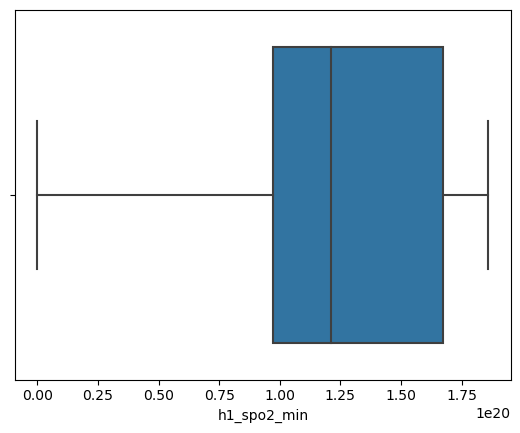

___________________________________________________________________________
h1_sysbp_max


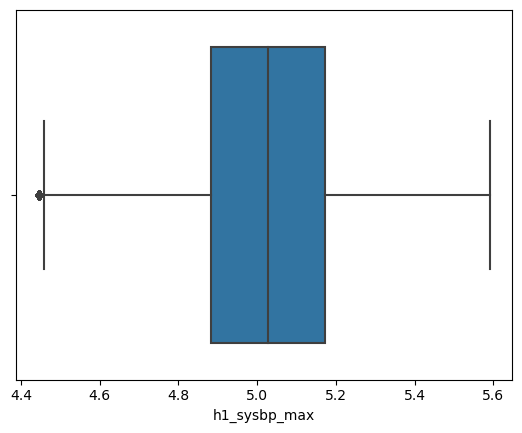

___________________________________________________________________________
h1_sysbp_min


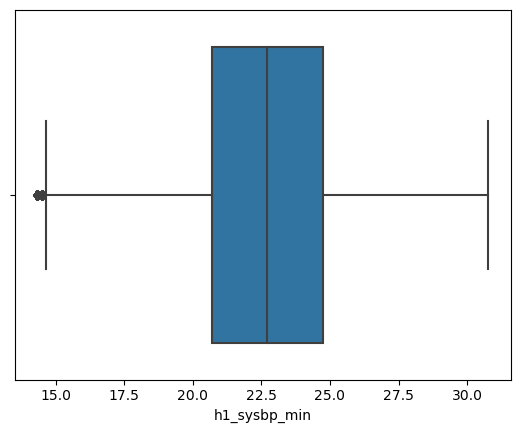

___________________________________________________________________________
h1_sysbp_noninvasive_max


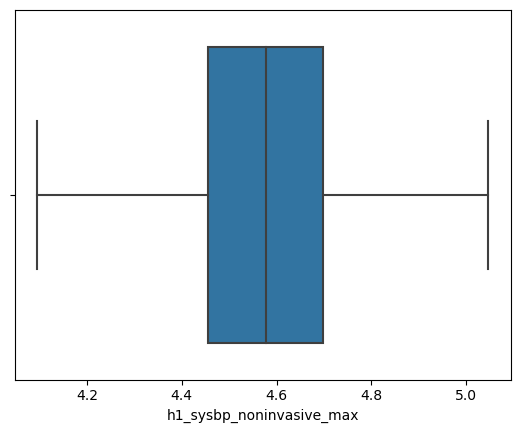

___________________________________________________________________________
h1_sysbp_noninvasive_min


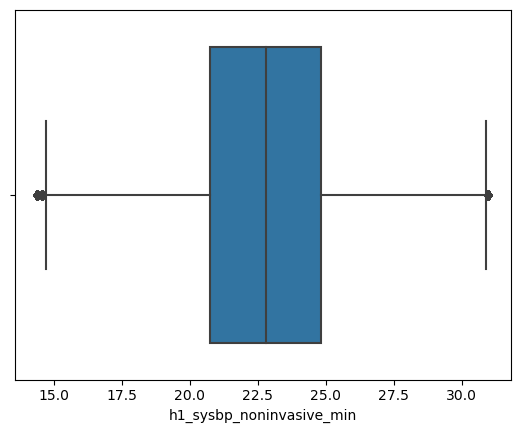

___________________________________________________________________________
d1_glucose_max


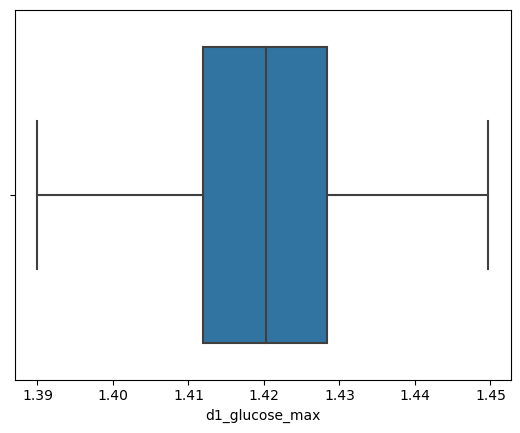

___________________________________________________________________________
d1_glucose_min


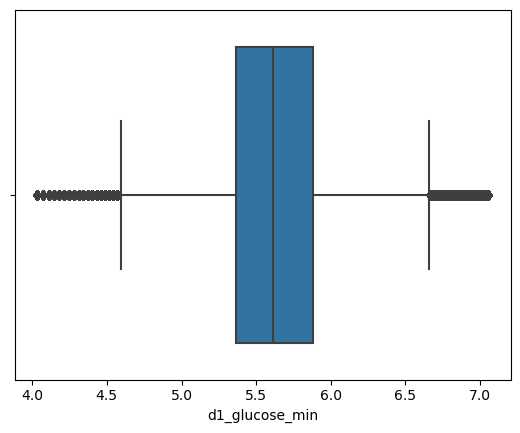

___________________________________________________________________________
d1_potassium_max


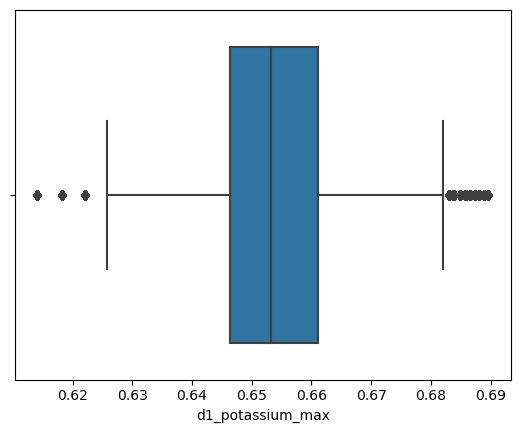

___________________________________________________________________________
d1_potassium_min


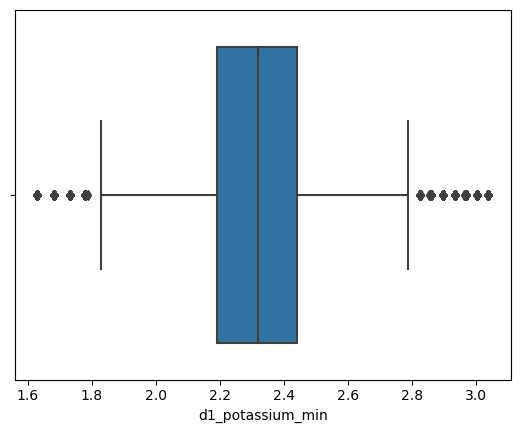

___________________________________________________________________________
apache_4a_hospital_death_prob


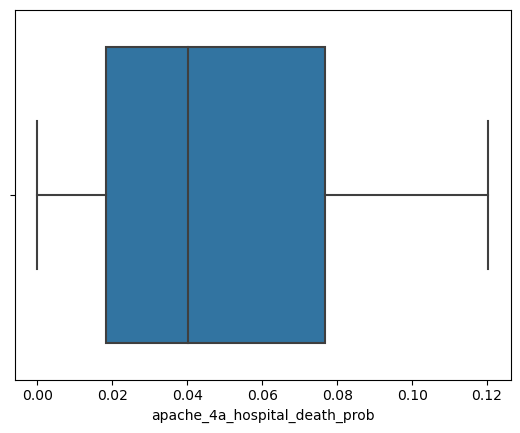

___________________________________________________________________________
apache_4a_icu_death_prob


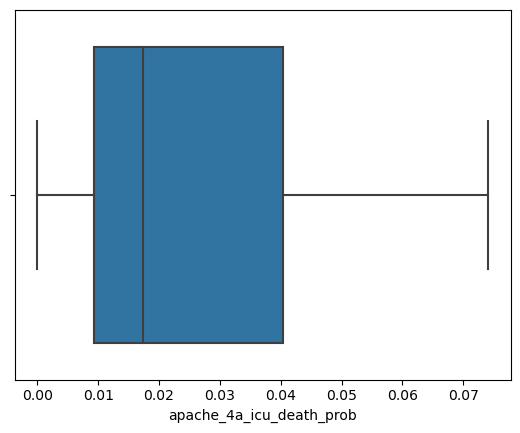

___________________________________________________________________________
aids


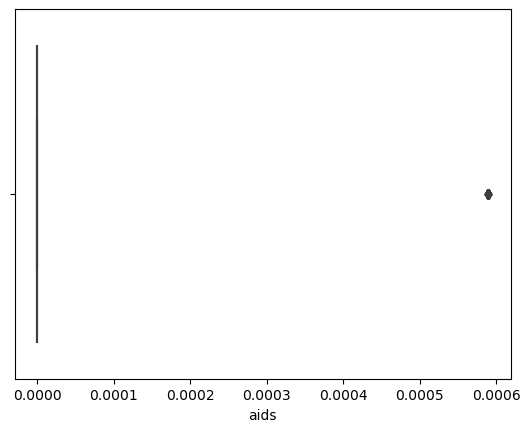

___________________________________________________________________________
cirrhosis


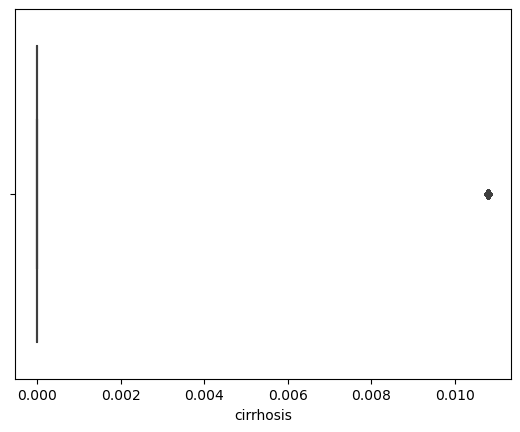

___________________________________________________________________________
diabetes_mellitus


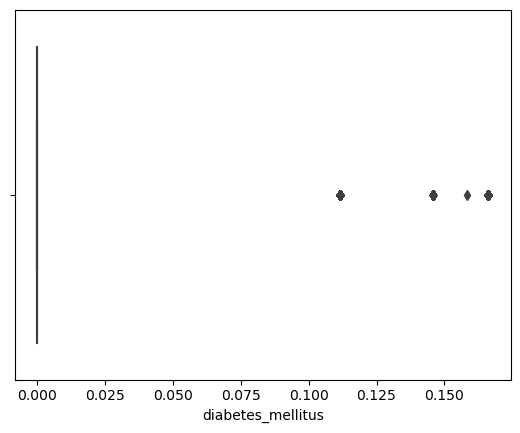

___________________________________________________________________________
hepatic_failure


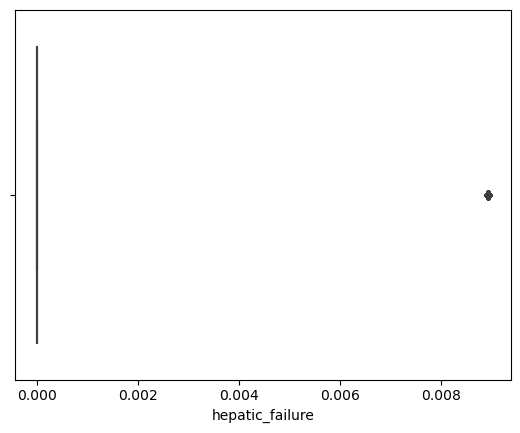

___________________________________________________________________________
immunosuppression


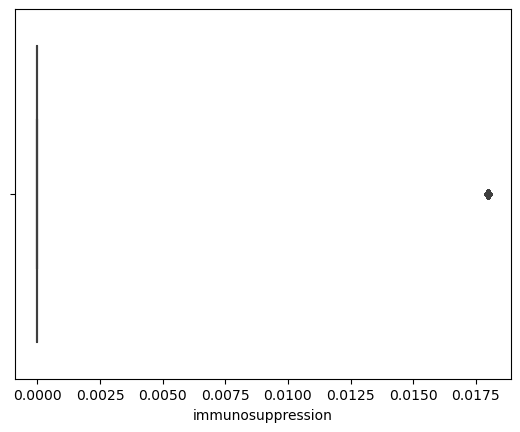

___________________________________________________________________________
leukemia


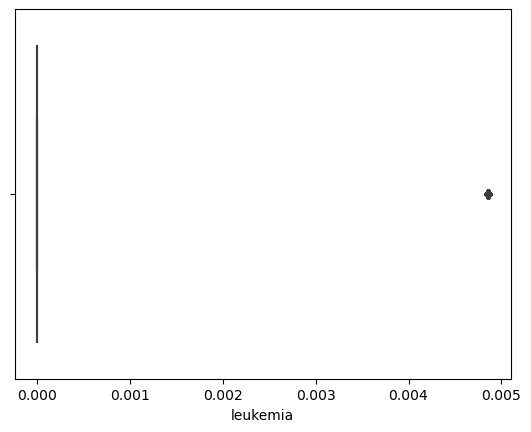

___________________________________________________________________________
lymphoma


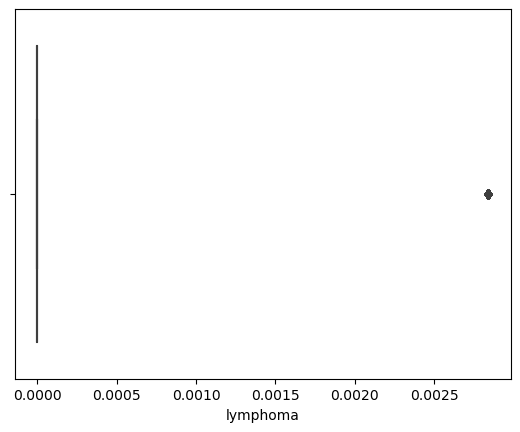

___________________________________________________________________________
solid_tumor_with_metastasis


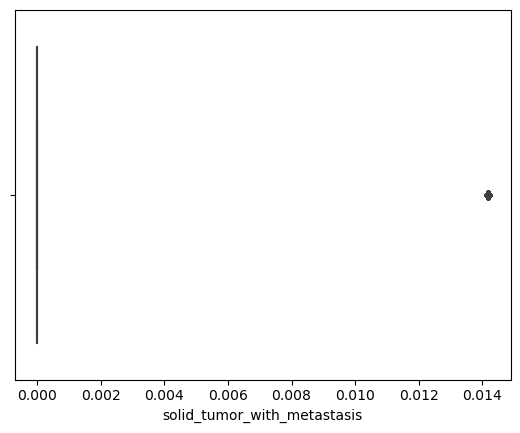

___________________________________________________________________________
hospital_death


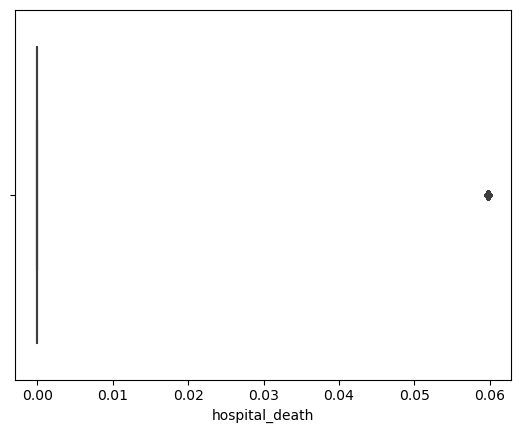

___________________________________________________________________________


In [207]:
for i in df_num.columns:
    print(i)
    sns.boxplot(df_num[i])
    plt.show()
    print('_'*75)

#  OUTLIERS TREATMENT USING CAPING 

In [208]:
# Outlier treatment
for col in df_num.columns:
    percentiles = df_num[col].quantile([0.01, 0.99]).values
    df_num[col][df[col] <= percentiles[0]] = percentiles[0]
    df_num[col][df[col] >= percentiles[1]] = percentiles[1]

apache_3j_bodysystem


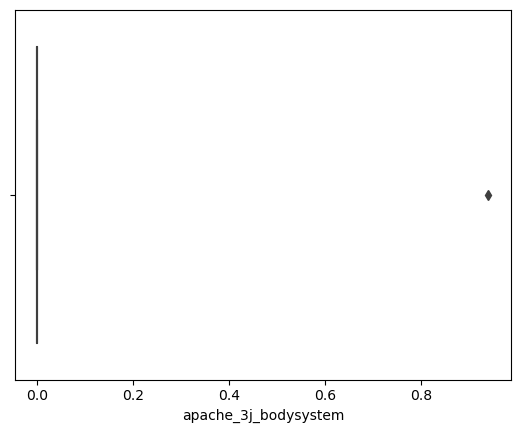

___________________________________________________________________________
ethnicity


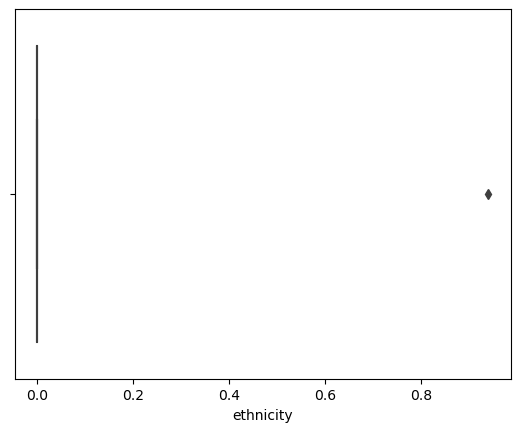

___________________________________________________________________________
gender


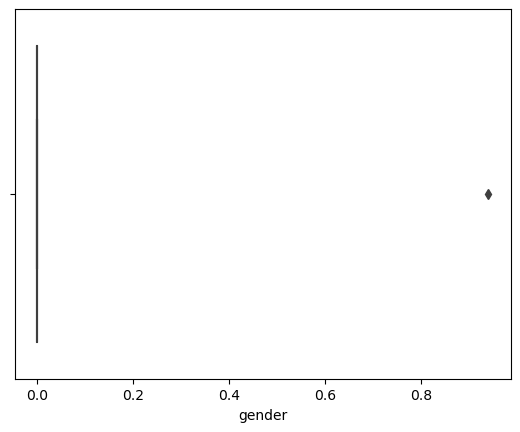

___________________________________________________________________________
icu_admit_source


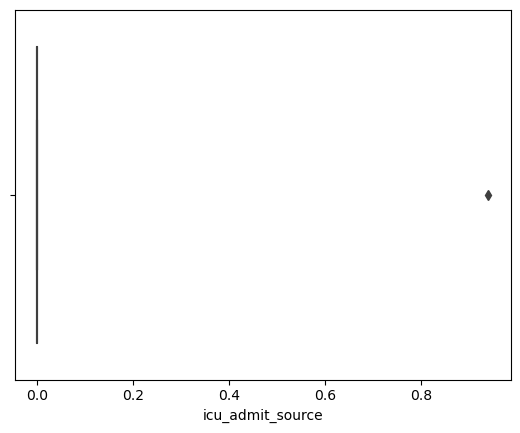

___________________________________________________________________________
icu_stay_type


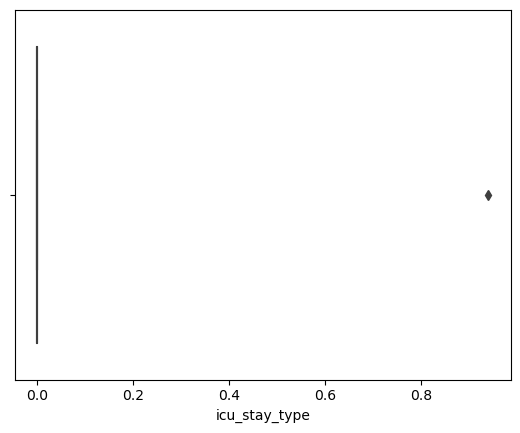

___________________________________________________________________________
icu_type


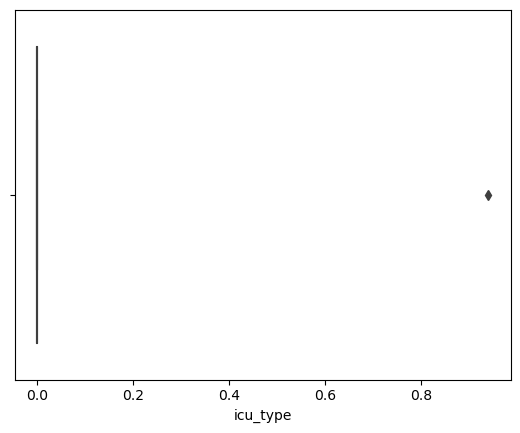

___________________________________________________________________________
age


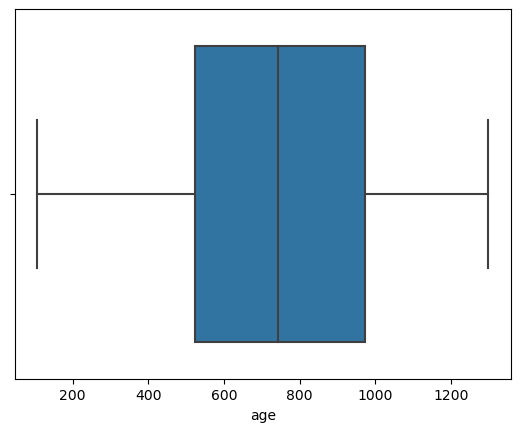

___________________________________________________________________________
bmi


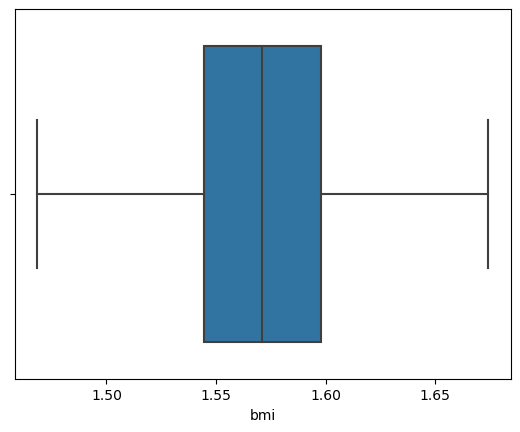

___________________________________________________________________________
elective_surgery


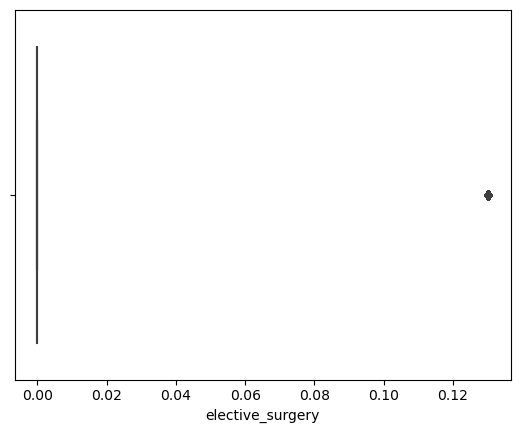

___________________________________________________________________________
height


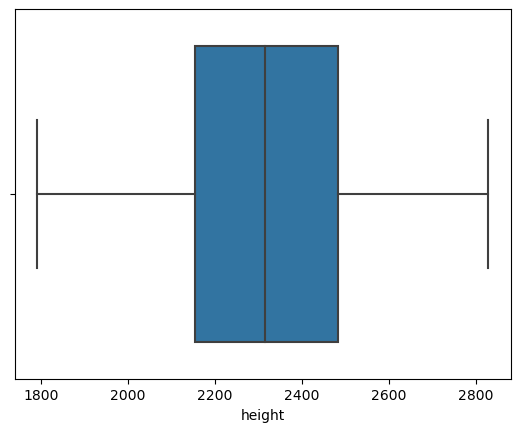

___________________________________________________________________________
pre_icu_los_days


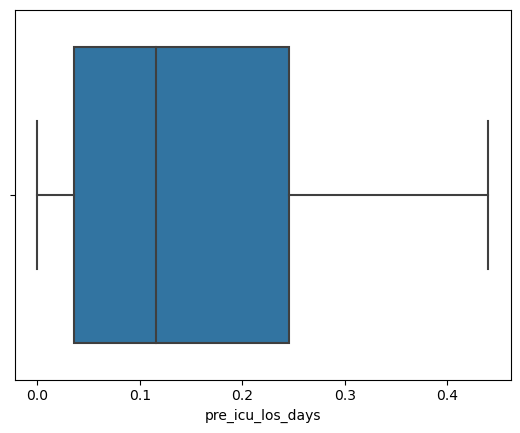

___________________________________________________________________________
weight


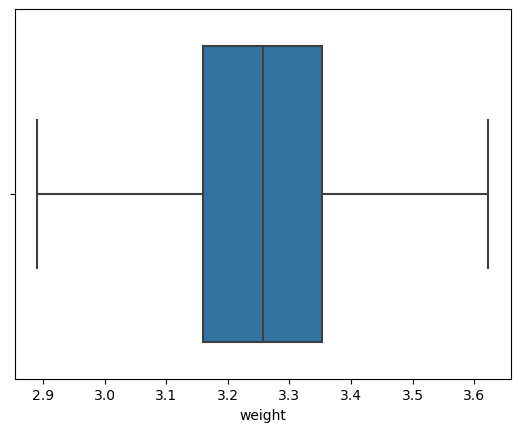

___________________________________________________________________________
apache_2_diagnosis


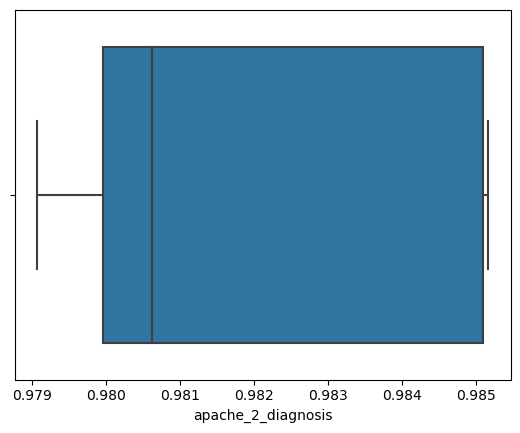

___________________________________________________________________________
apache_3j_diagnosis


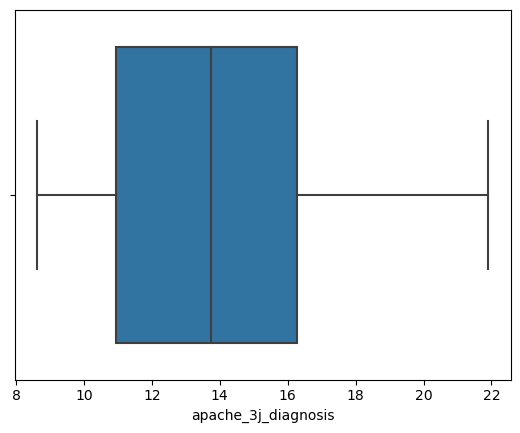

___________________________________________________________________________
apache_post_operative


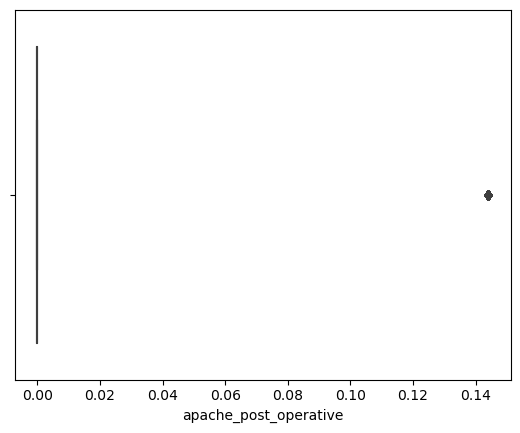

___________________________________________________________________________
arf_apache


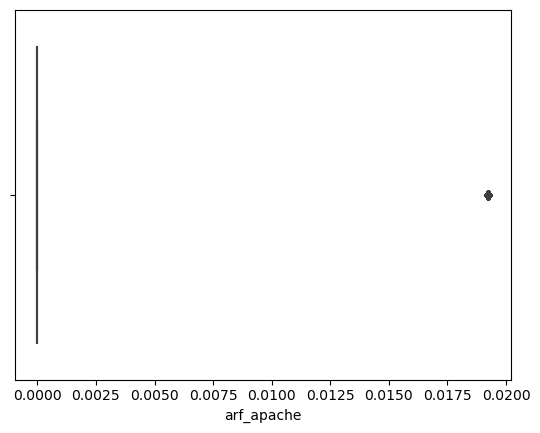

___________________________________________________________________________
gcs_eyes_apache


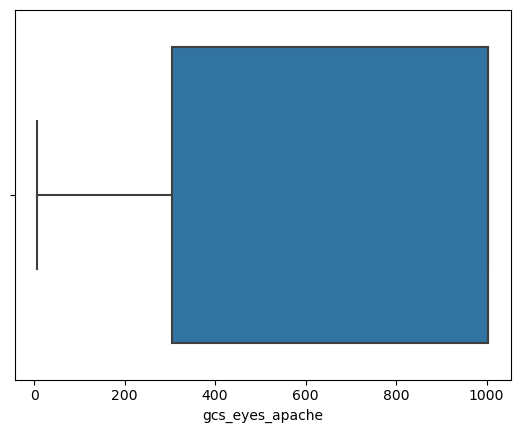

___________________________________________________________________________
gcs_motor_apache


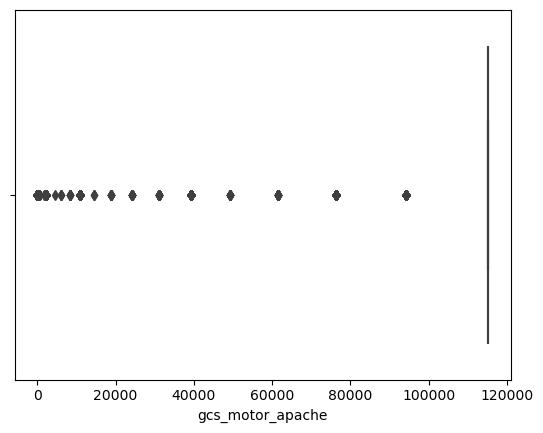

___________________________________________________________________________
gcs_unable_apache


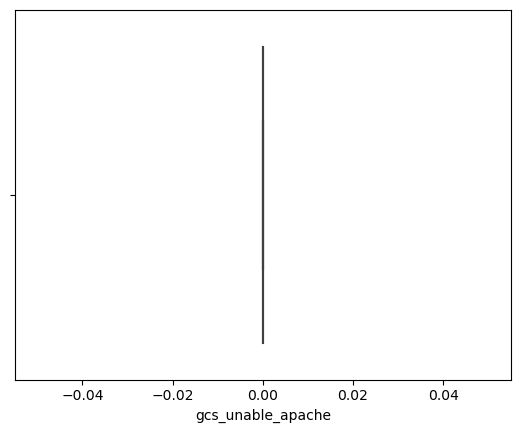

___________________________________________________________________________
gcs_verbal_apache


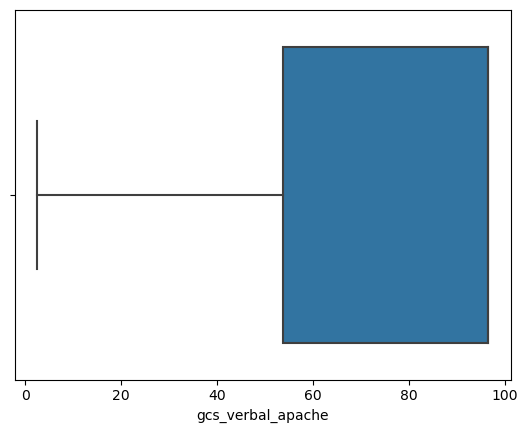

___________________________________________________________________________
heart_rate_apache


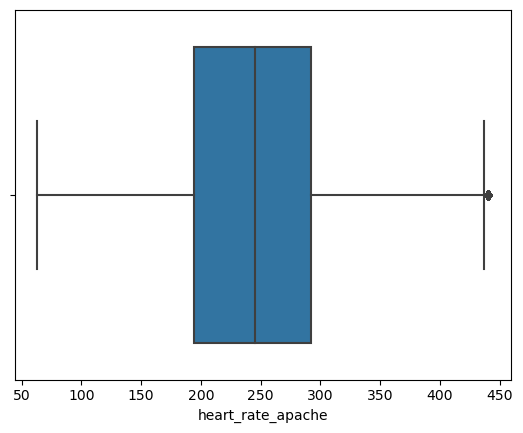

___________________________________________________________________________
intubated_apache


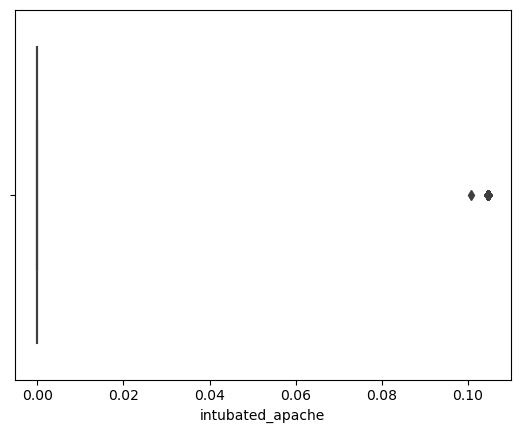

___________________________________________________________________________
map_apache


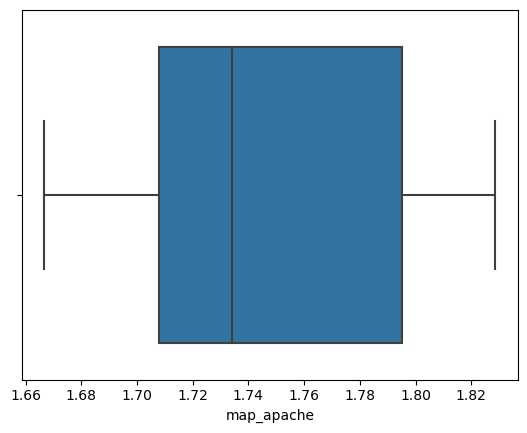

___________________________________________________________________________
resprate_apache


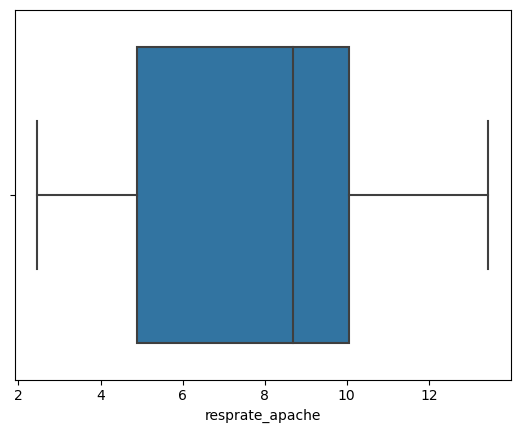

___________________________________________________________________________
temp_apache


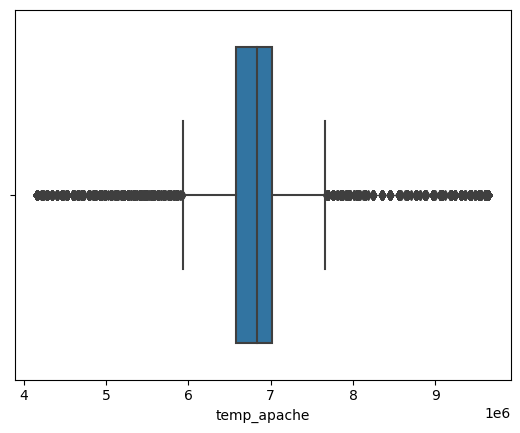

___________________________________________________________________________
ventilated_apache


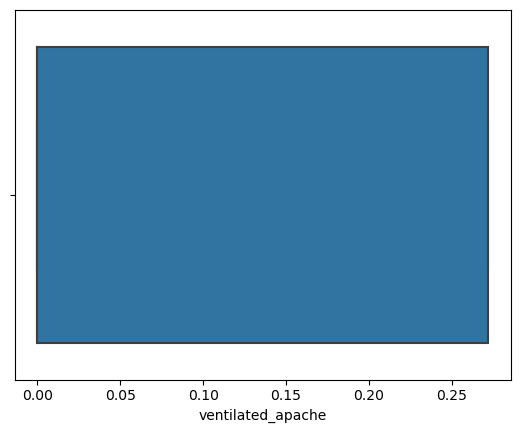

___________________________________________________________________________
d1_diasbp_max


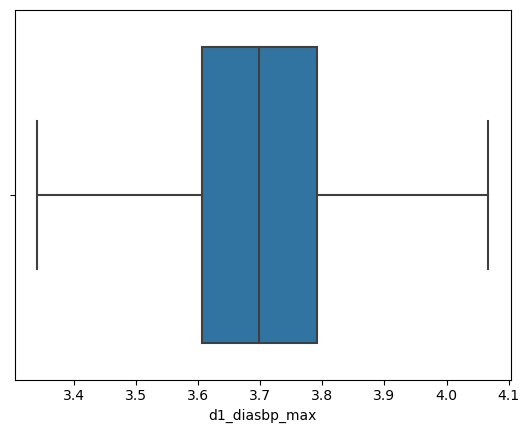

___________________________________________________________________________
d1_diasbp_min


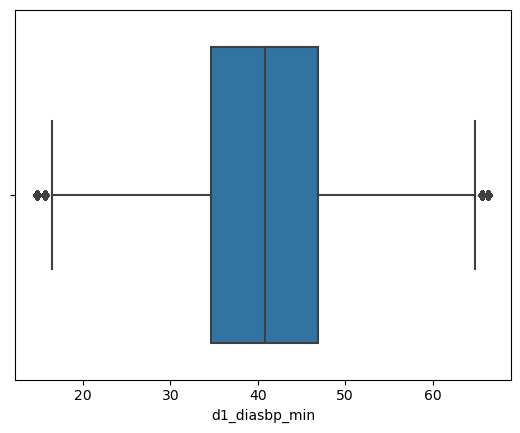

___________________________________________________________________________
d1_diasbp_noninvasive_max


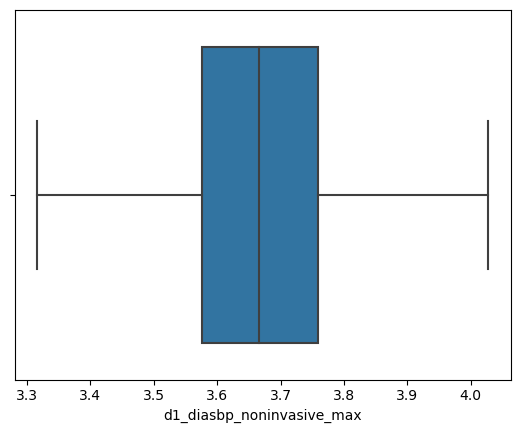

___________________________________________________________________________
d1_diasbp_noninvasive_min


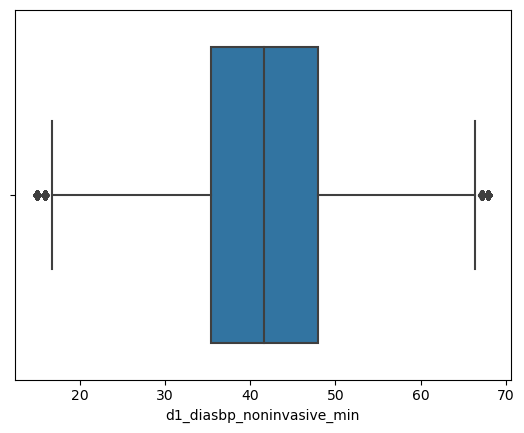

___________________________________________________________________________
d1_heartrate_max


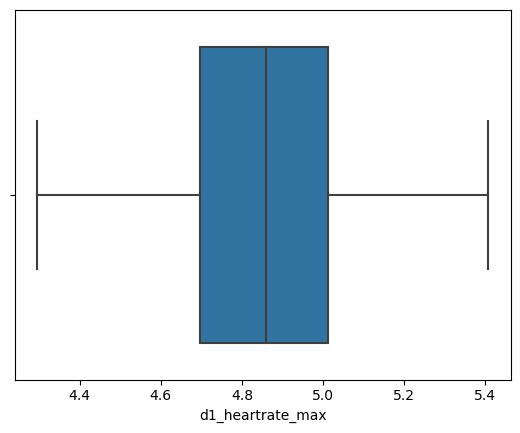

___________________________________________________________________________
d1_heartrate_min


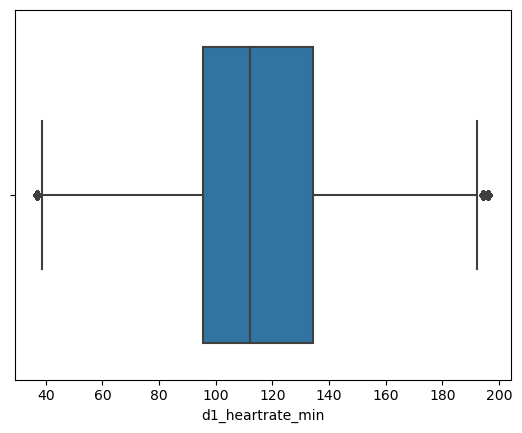

___________________________________________________________________________
d1_mbp_max


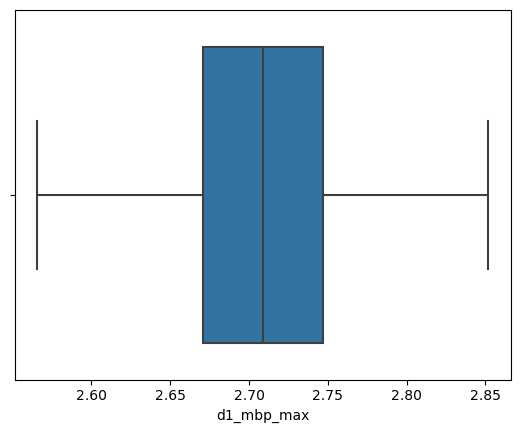

___________________________________________________________________________
d1_mbp_min


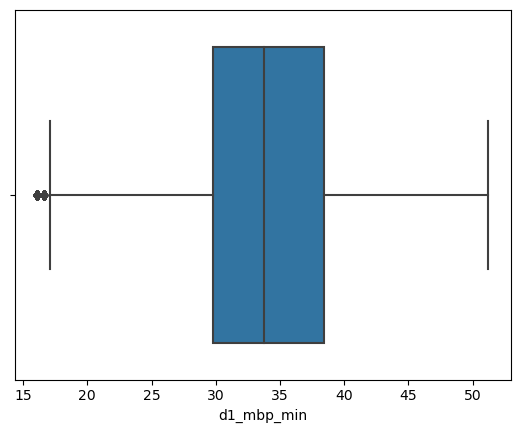

___________________________________________________________________________
d1_mbp_noninvasive_max


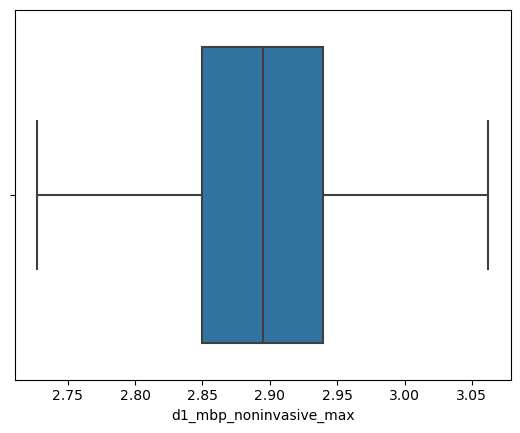

___________________________________________________________________________
d1_mbp_noninvasive_min


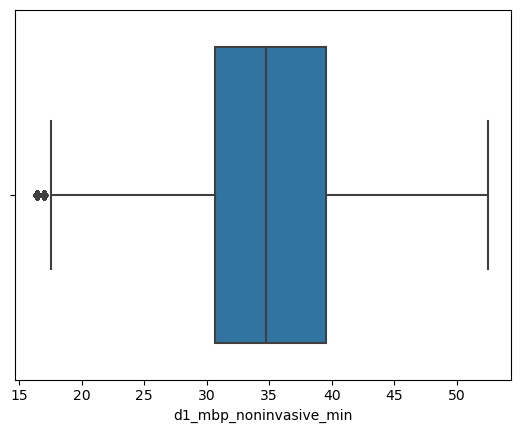

___________________________________________________________________________
d1_resprate_max


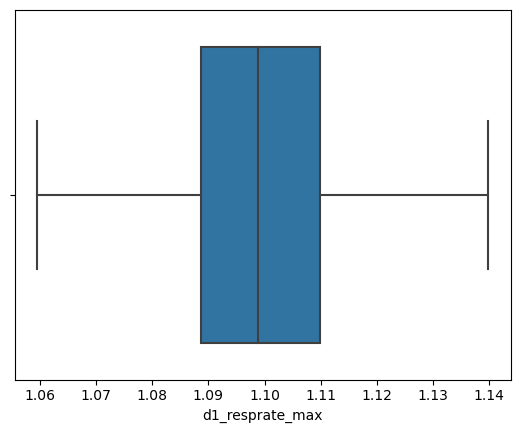

___________________________________________________________________________
d1_resprate_min


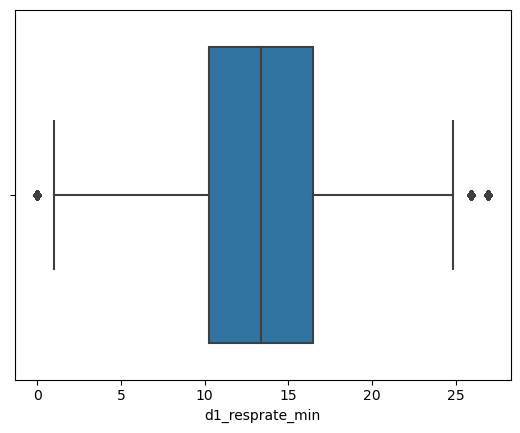

___________________________________________________________________________
d1_spo2_max


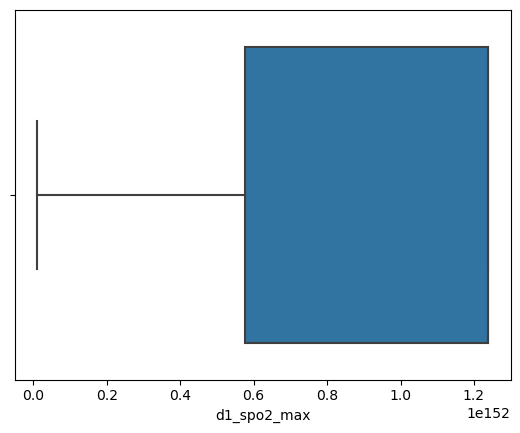

___________________________________________________________________________
d1_spo2_min


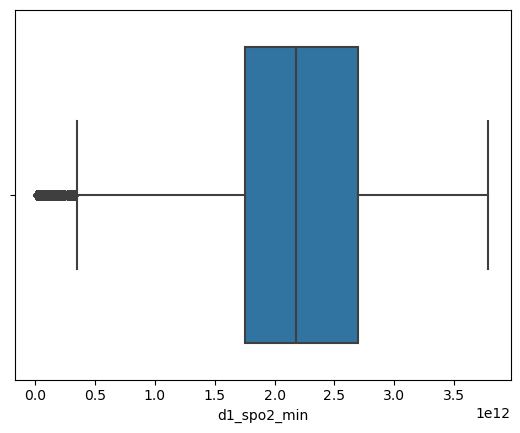

___________________________________________________________________________
d1_sysbp_max


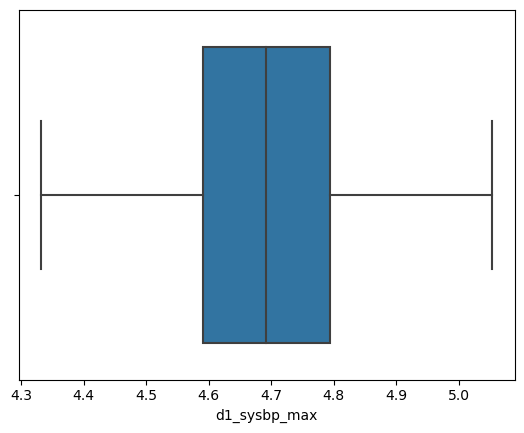

___________________________________________________________________________
d1_sysbp_min


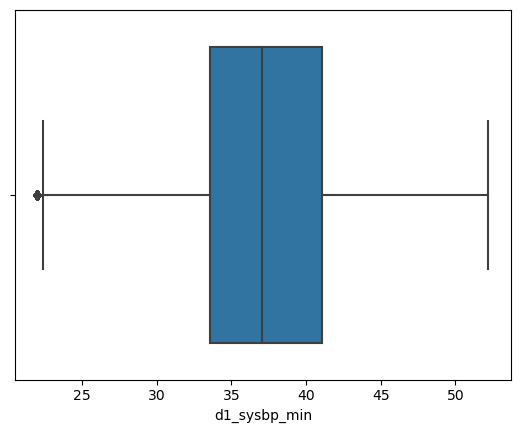

___________________________________________________________________________
d1_sysbp_noninvasive_max


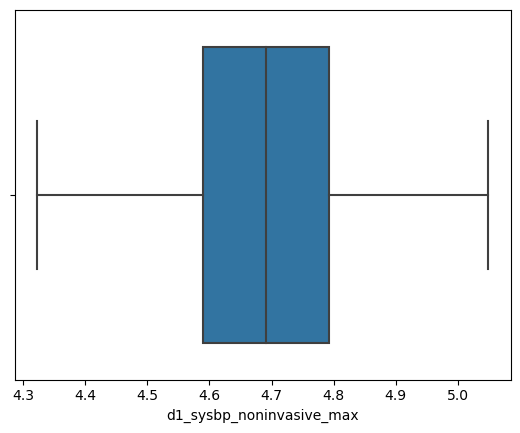

___________________________________________________________________________
d1_sysbp_noninvasive_min


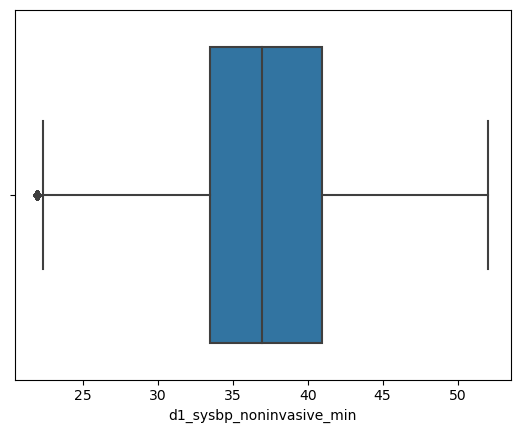

___________________________________________________________________________
d1_temp_max


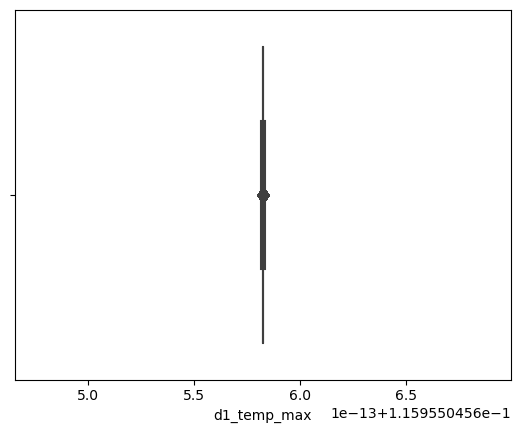

___________________________________________________________________________
d1_temp_min


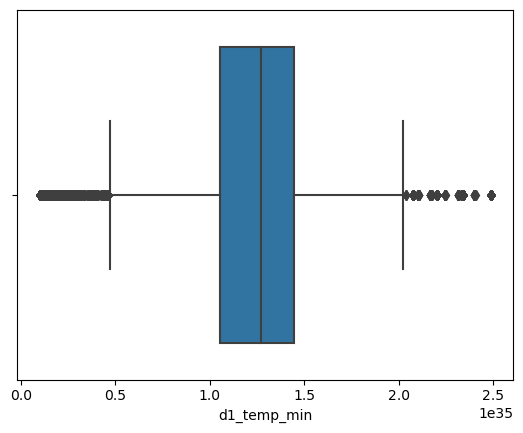

___________________________________________________________________________
h1_diasbp_max


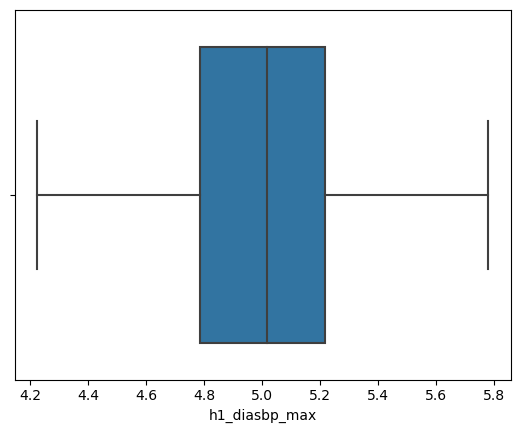

___________________________________________________________________________
h1_diasbp_min


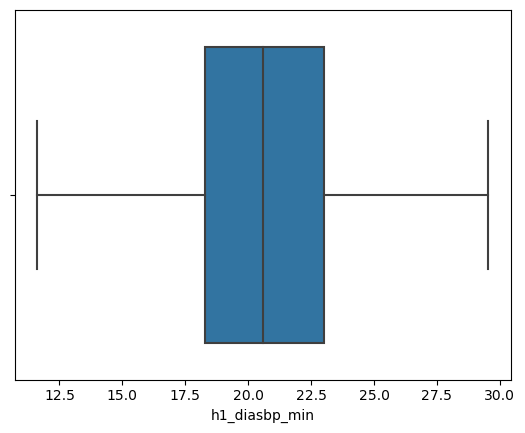

___________________________________________________________________________
h1_diasbp_noninvasive_max


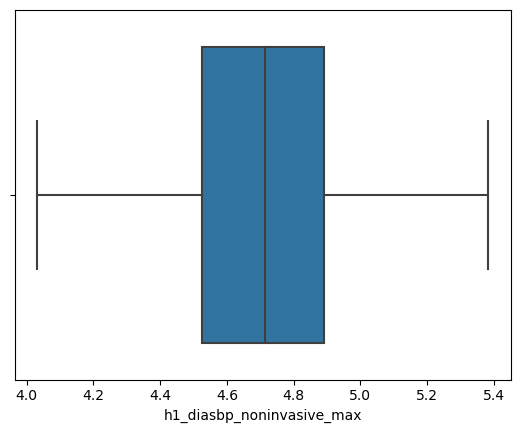

___________________________________________________________________________
h1_diasbp_noninvasive_min


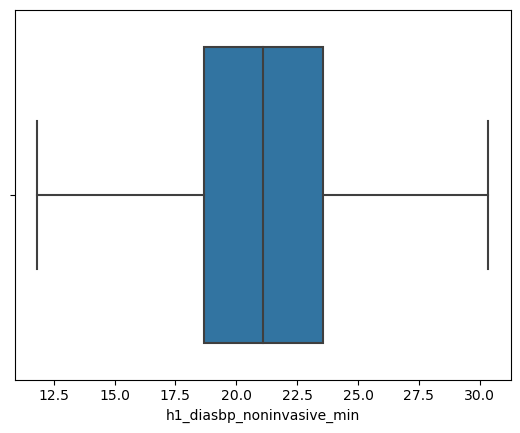

___________________________________________________________________________
h1_heartrate_max


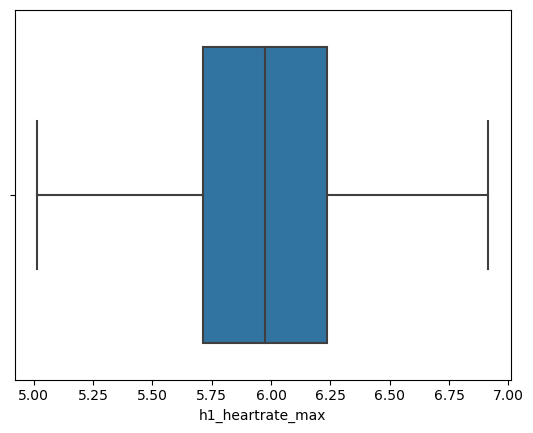

___________________________________________________________________________
h1_heartrate_min


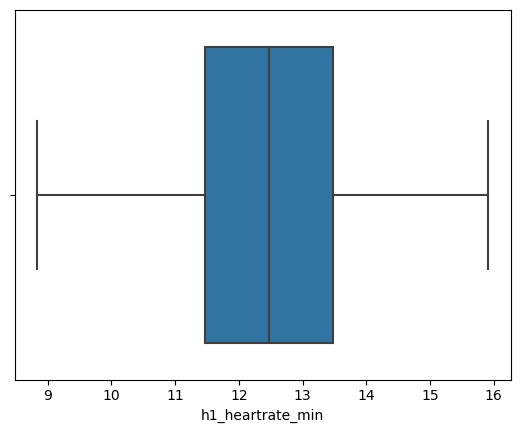

___________________________________________________________________________
h1_mbp_max


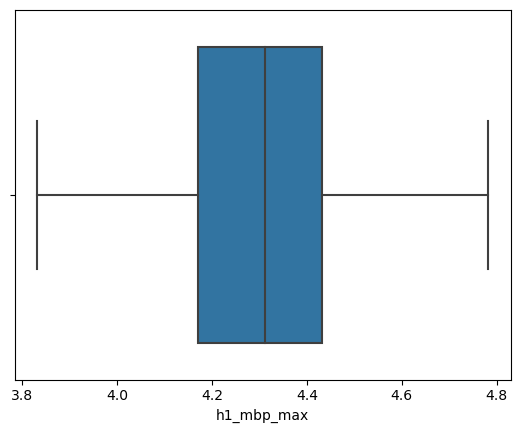

___________________________________________________________________________
h1_mbp_min


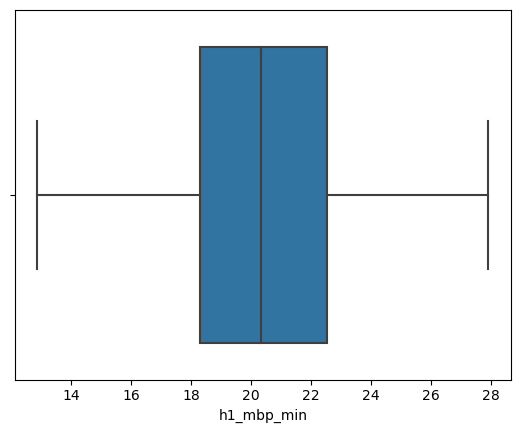

___________________________________________________________________________
h1_mbp_noninvasive_max


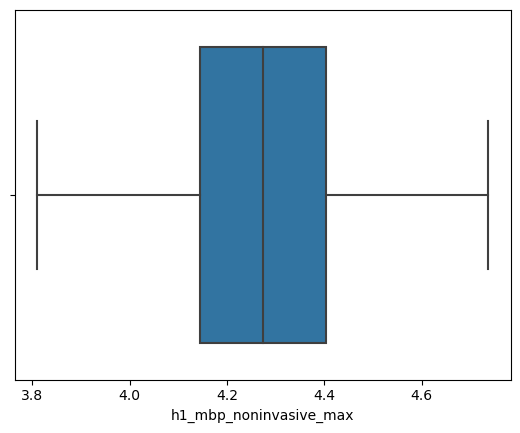

___________________________________________________________________________
h1_mbp_noninvasive_min


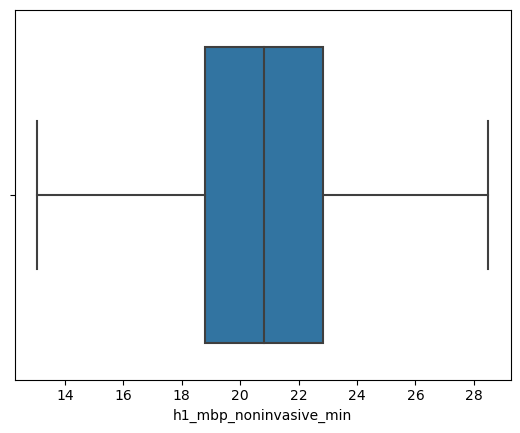

___________________________________________________________________________
h1_resprate_max


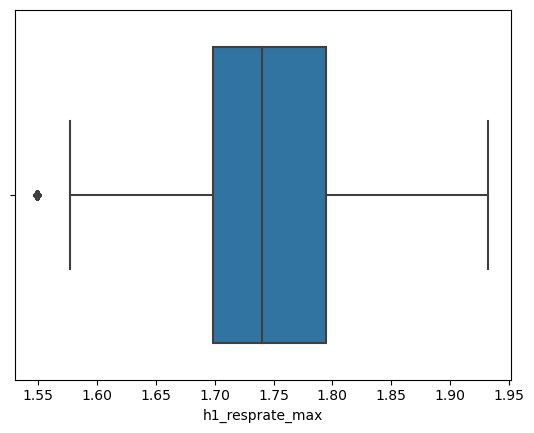

___________________________________________________________________________
h1_resprate_min


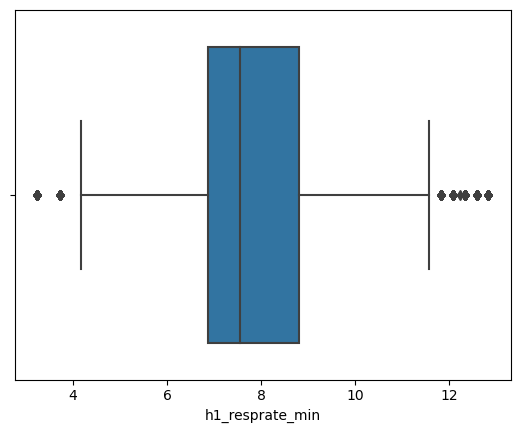

___________________________________________________________________________
h1_spo2_max


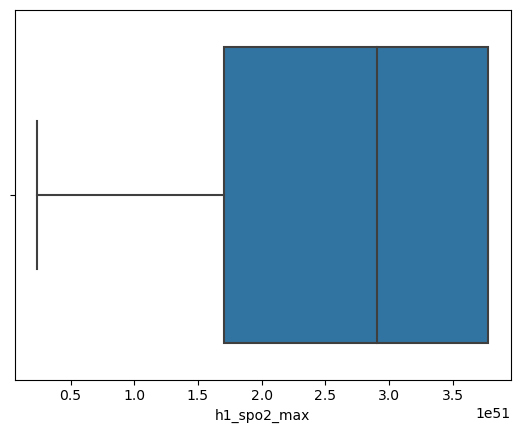

___________________________________________________________________________
h1_spo2_min


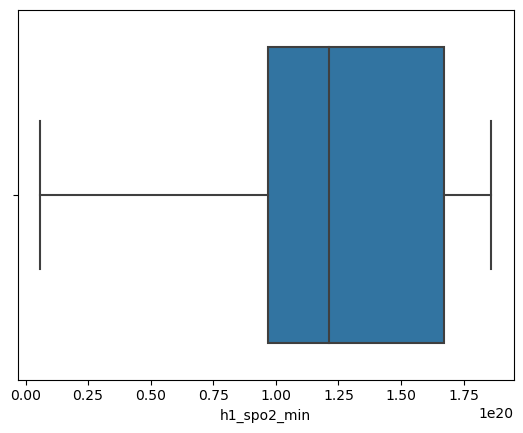

___________________________________________________________________________
h1_sysbp_max


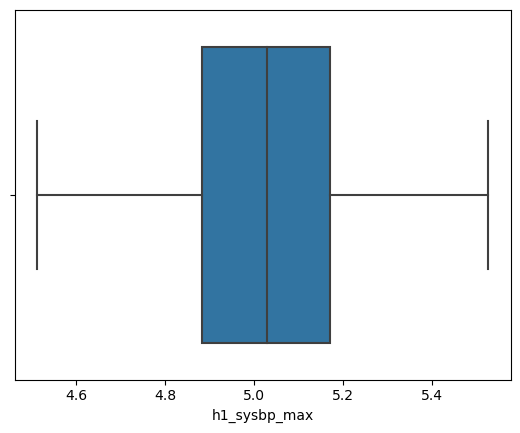

___________________________________________________________________________
h1_sysbp_min


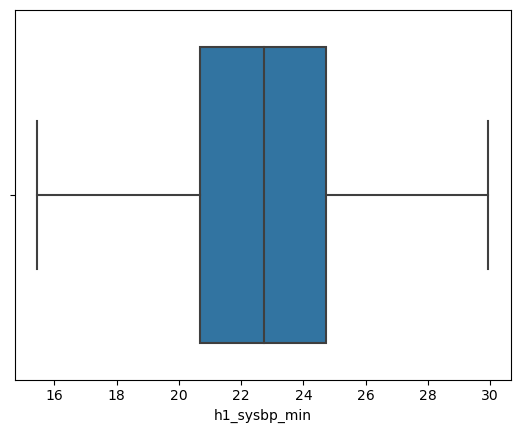

___________________________________________________________________________
h1_sysbp_noninvasive_max


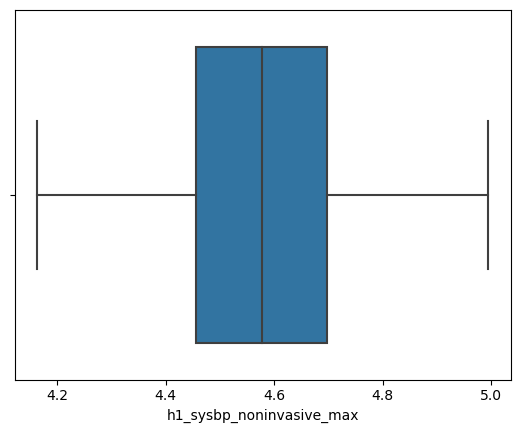

___________________________________________________________________________
h1_sysbp_noninvasive_min


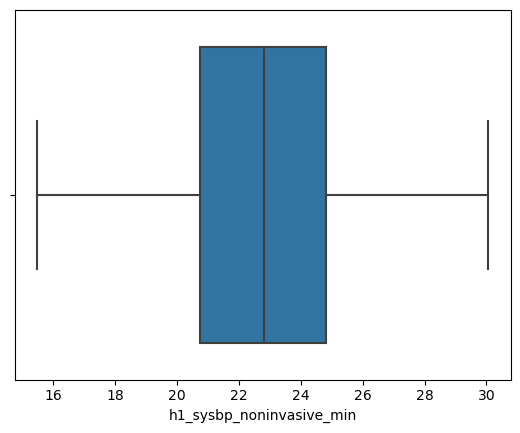

___________________________________________________________________________
d1_glucose_max


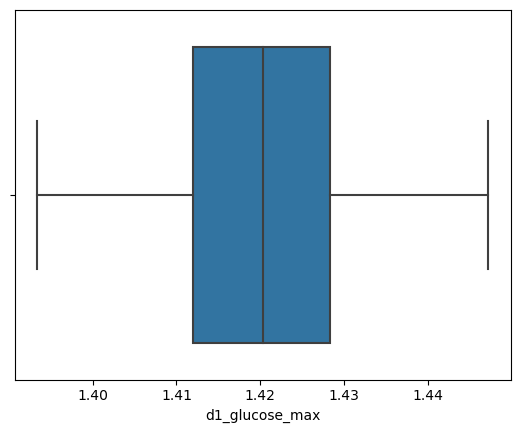

___________________________________________________________________________
d1_glucose_min


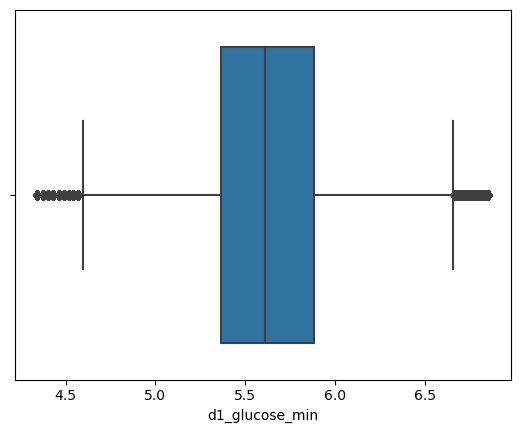

___________________________________________________________________________
d1_potassium_max


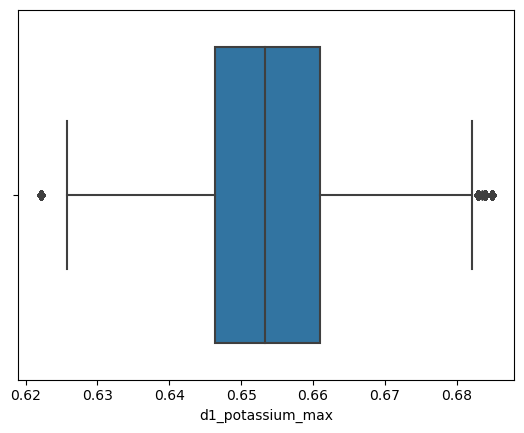

___________________________________________________________________________
d1_potassium_min


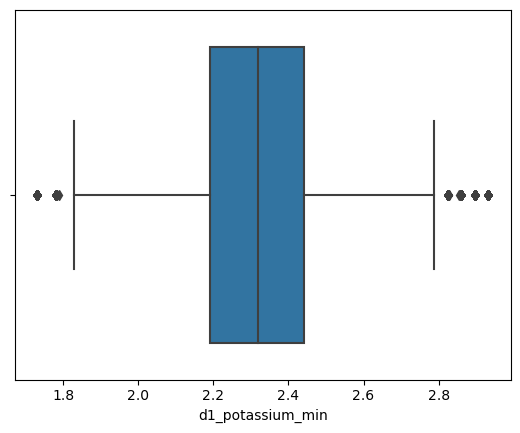

___________________________________________________________________________
apache_4a_hospital_death_prob


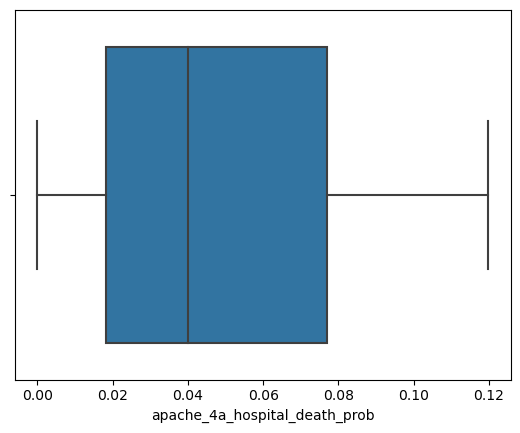

___________________________________________________________________________
apache_4a_icu_death_prob


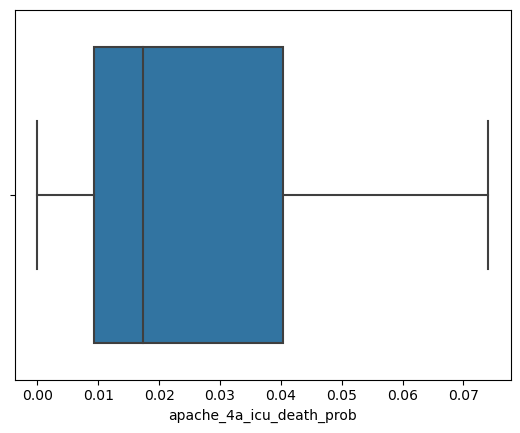

___________________________________________________________________________
aids


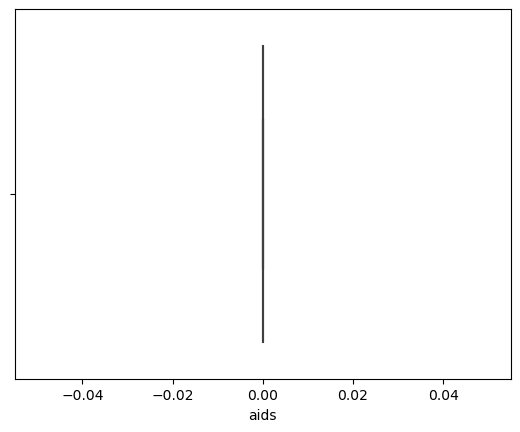

___________________________________________________________________________
cirrhosis


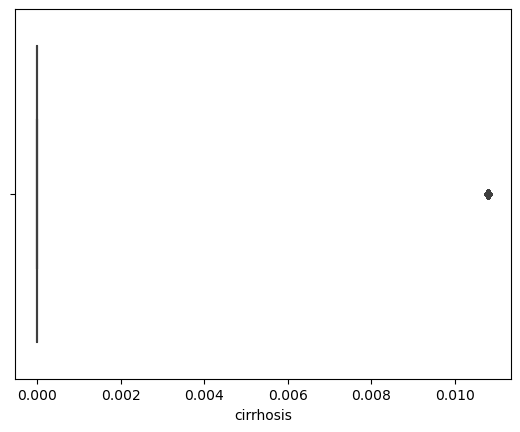

___________________________________________________________________________
diabetes_mellitus


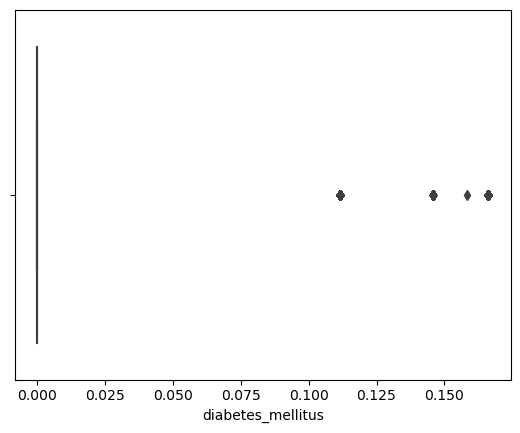

___________________________________________________________________________
hepatic_failure


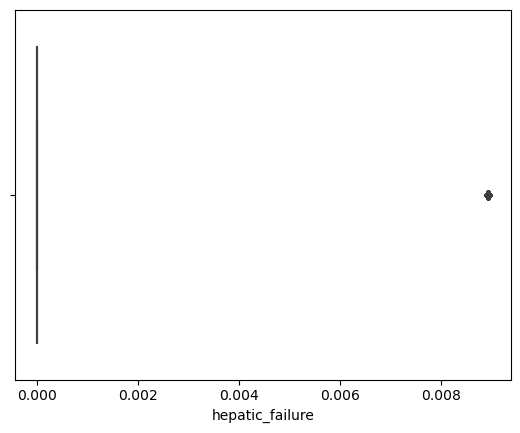

___________________________________________________________________________
immunosuppression


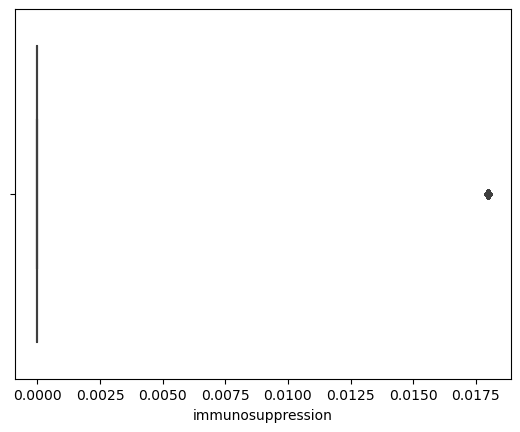

___________________________________________________________________________
leukemia


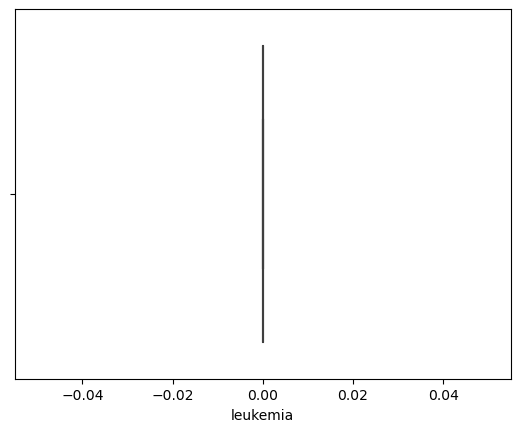

___________________________________________________________________________
lymphoma


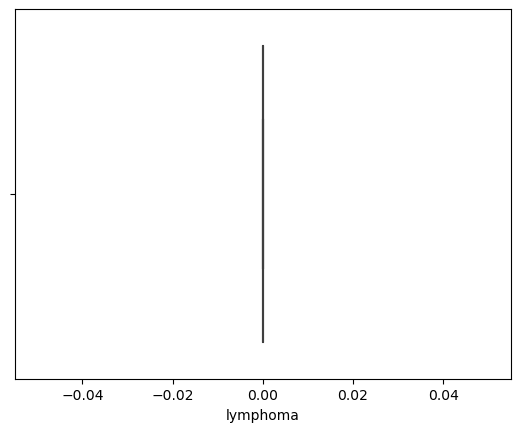

___________________________________________________________________________
solid_tumor_with_metastasis


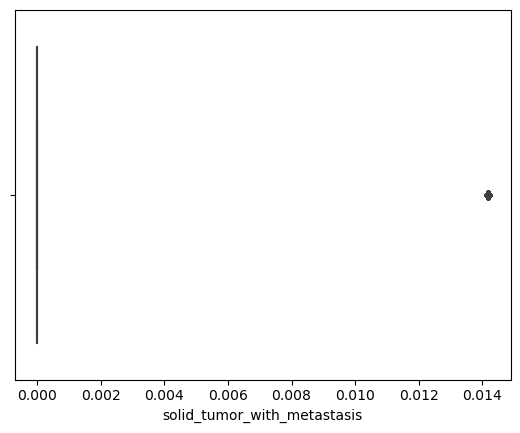

___________________________________________________________________________
hospital_death


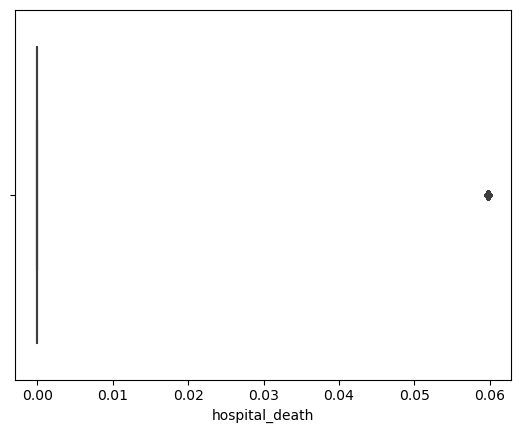

___________________________________________________________________________


In [209]:
for i in df_num.columns:
    print(i)
    sns.boxplot(df_num[i])
    plt.show()
    print('_'*75)

# Box plot of categorical columns for checking outliers


In [210]:
df_cat = df.select_dtypes(include = 'object')

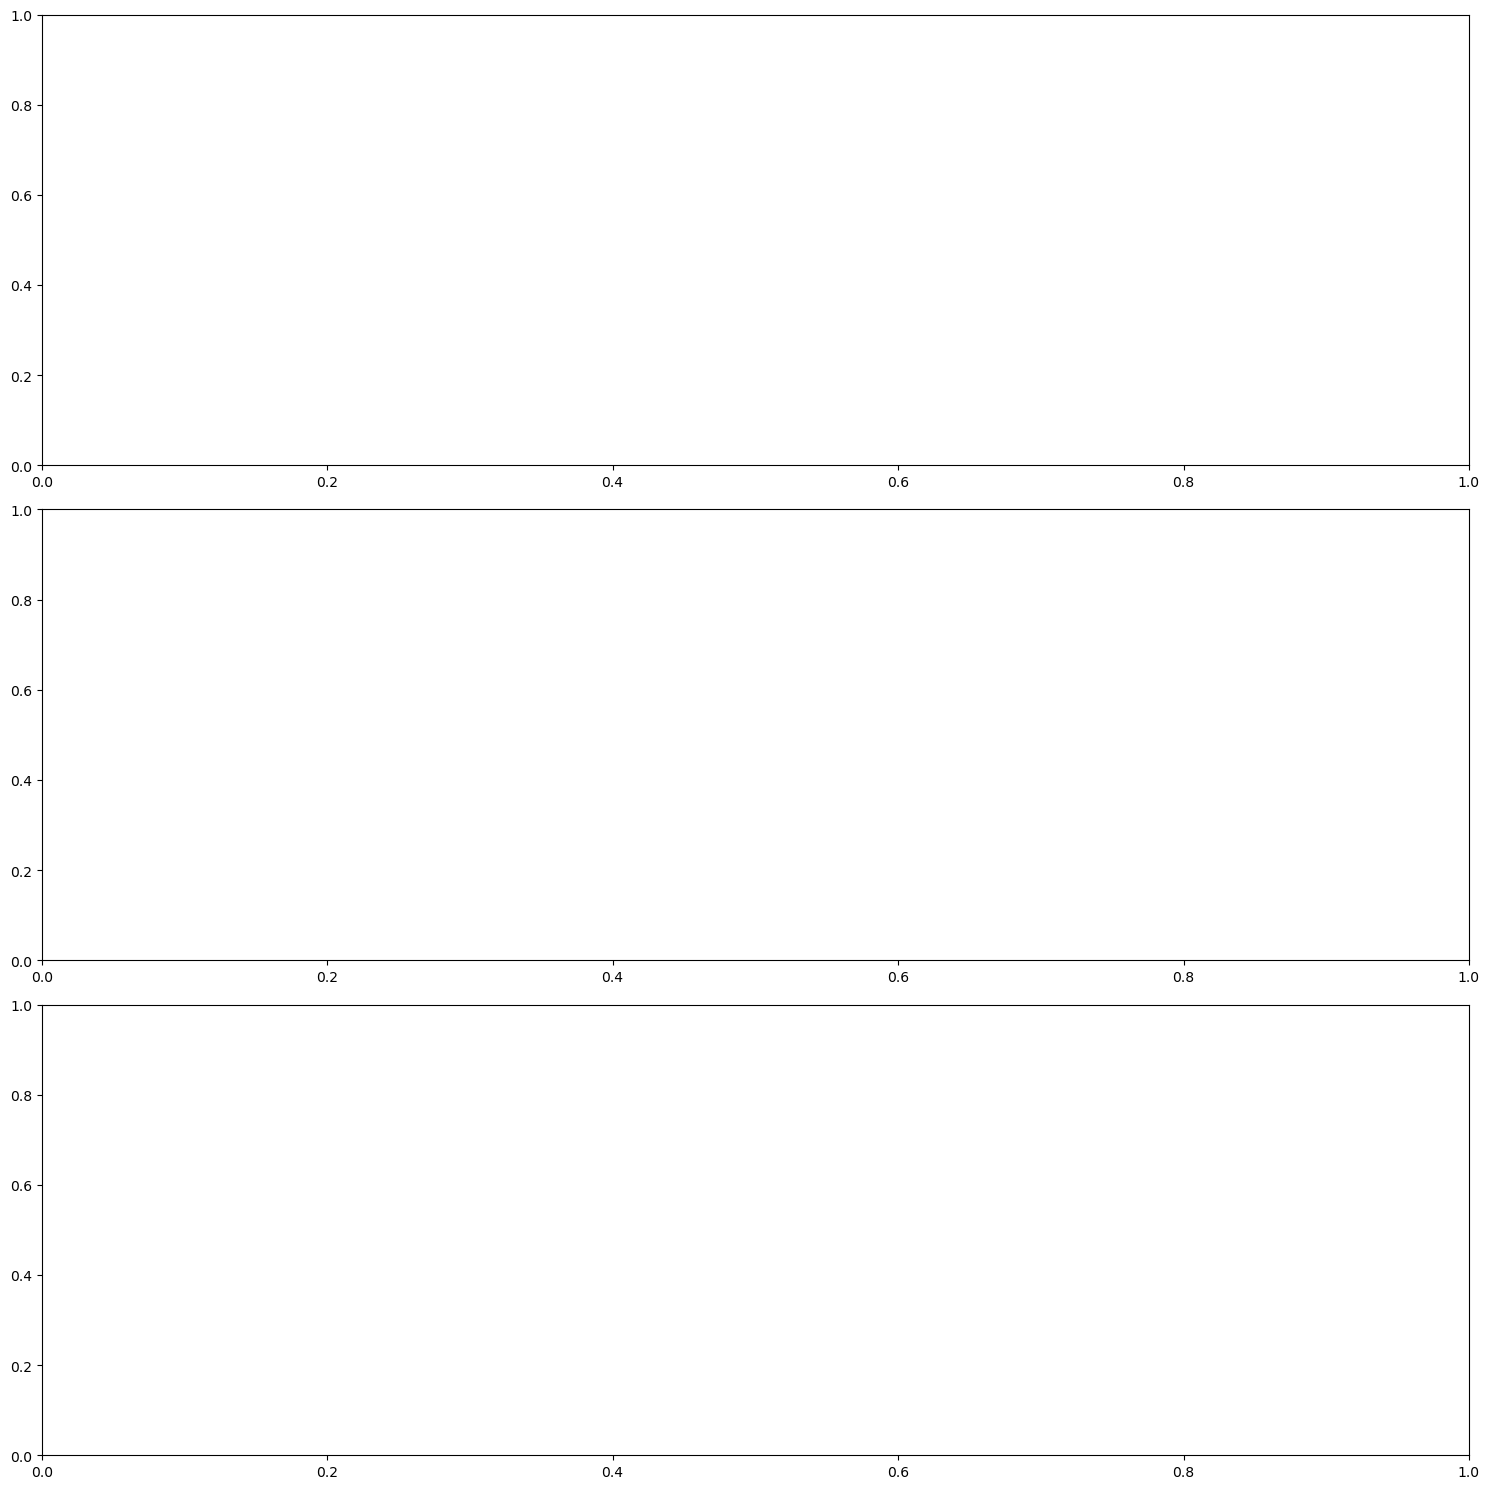

In [211]:
# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# Plot a boxplot for all the categorical variables
for variable, subplot in zip(df_cat, ax.flatten()):
    # Plot the boxplot
    sns.boxplot(x=variable, y='hospital_death', data=df, ax=subplot)
    
    # Set the x-axis label
    subplot.set_xlabel(variable, fontsize=15)
    
    # Set the title for each subplot
    subplot.set_title(f'Boxplot for {variable} vs hospital_death', fontsize=15)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

# correlation between numeric columns

In [212]:
# Select numerical columns
df_num = df.select_dtypes(include='number')

# Calculate the correlation matrix
df_cor = df_num.corr()

# Display the correlation matrix
df_cor

apache_3j_bodysystem  ethnicity    gender  \
apache_3j_bodysystem                       1.000000  -0.166667 -0.166667   
ethnicity                                 -0.166667   1.000000 -0.166667   
gender                                    -0.166667  -0.166667  1.000000   
icu_admit_source                          -0.166667  -0.166667 -0.166667   
icu_stay_type                             -0.166667  -0.166667 -0.166667   
icu_type                                  -0.166667  -0.166667 -0.166667   
age                                        0.154228   0.176839  0.390797   
bmi                                       -0.059041  -0.372893 -0.066974   
elective_surgery                          -0.166667  -0.166667 -0.166667   
height                                     0.593422   0.205924 -0.526837   
pre_icu_los_days                          -0.291529   0.532968  0.730227   
weight                                     0.199927  -0.242240 -0.319077   
apache_2_diagnosis                         0.773430  -0.259888 -0.336425   
apache_3j_diagnosis                       -0.115480   0.031730 -0.526758   
apache_post_operative                     -0.166667  -0.166667 -0.166667   
arf_apache                                      NaN        NaN       NaN   
gcs_eyes_apache                            0.456816  -0.265643 -0.573521   
gcs_motor_apache                           0.251557   0.251557 -0.801014   
gcs_unable_apache                               NaN        NaN       NaN   
gcs_verbal_apache                          0.325399  -0.167834 -0.756946   
heart_rate_apache                          0.076853   0.176248  0.216274   
intubated_apache                          -0.258199  -0.258199 -0.258199   
map_apache                                 0.466666  -0.609490 -0.447549   
resprate_apache                            0.157831   0.179429  0.113707   
temp_apache                                0.046808   0.876769 -0.326750   
ventilated_apache                         -0.353553  -0.353553  0.471405   
d1_diasbp_max                              0.372419  -0.260155  0.289335   
d1_diasbp_min                              0.388759  -0.397599 -0.598884   
d1_diasbp_noninvasive_max                  0.372257  -0.259897  0.289285   
d1_diasbp_noninvasive_min                  0.388733  -0.397626 -0.598435   
d1_heartrate_max                           0.160717   0.362903  0.329903   
d1_heartrate_min                           0.381844  -0.081253 -0.081253   
d1_mbp_max                                 0.532002  -0.473119  0.377551   
d1_mbp_min                                 0.167901  -0.506898 -0.678546   
d1_mbp_noninvasive_max                     0.533109  -0.473109  0.377675   
d1_mbp_noninvasive_min                     0.167570  -0.507033 -0.678027   
d1_resprate_max                            0.259800   0.337481  0.259800   
d1_resprate_min                           -0.158441  -0.158441  0.086864   
d1_spo2_max                               -0.705582   0.257340  0.257340   
d1_spo2_min                                0.138569  -0.535838 -0.606698   
d1_sysbp_max                               0.665493  -0.762349  0.232983   
d1_sysbp_min                               0.164296  -0.459321 -0.576817   
d1_sysbp_noninvasive_max                   0.665491  -0.762352  0.232984   
d1_sysbp_noninvasive_min                   0.164325  -0.459328 -0.576853   
d1_temp_max                               -0.267576   0.841697 -0.537486   
d1_temp_min                                0.192402   0.633266 -0.414873   
h1_diasbp_max                              0.197894  -0.319008 -0.524492   
h1_diasbp_min                              0.658191  -0.014591 -0.448082   
h1_diasbp_noninvasive_max                  0.316832  -0.294474 -0.538756   
h1_diasbp_noninvasive_min                  0.675084  -0.061390 -0.534753   
h1_heartrate_max                          -0.420503   0.614205  0.488416   
h1_heartrate_min                          -0.133186   0.638638  0.404236   
h1_

# heat map of numeric columns

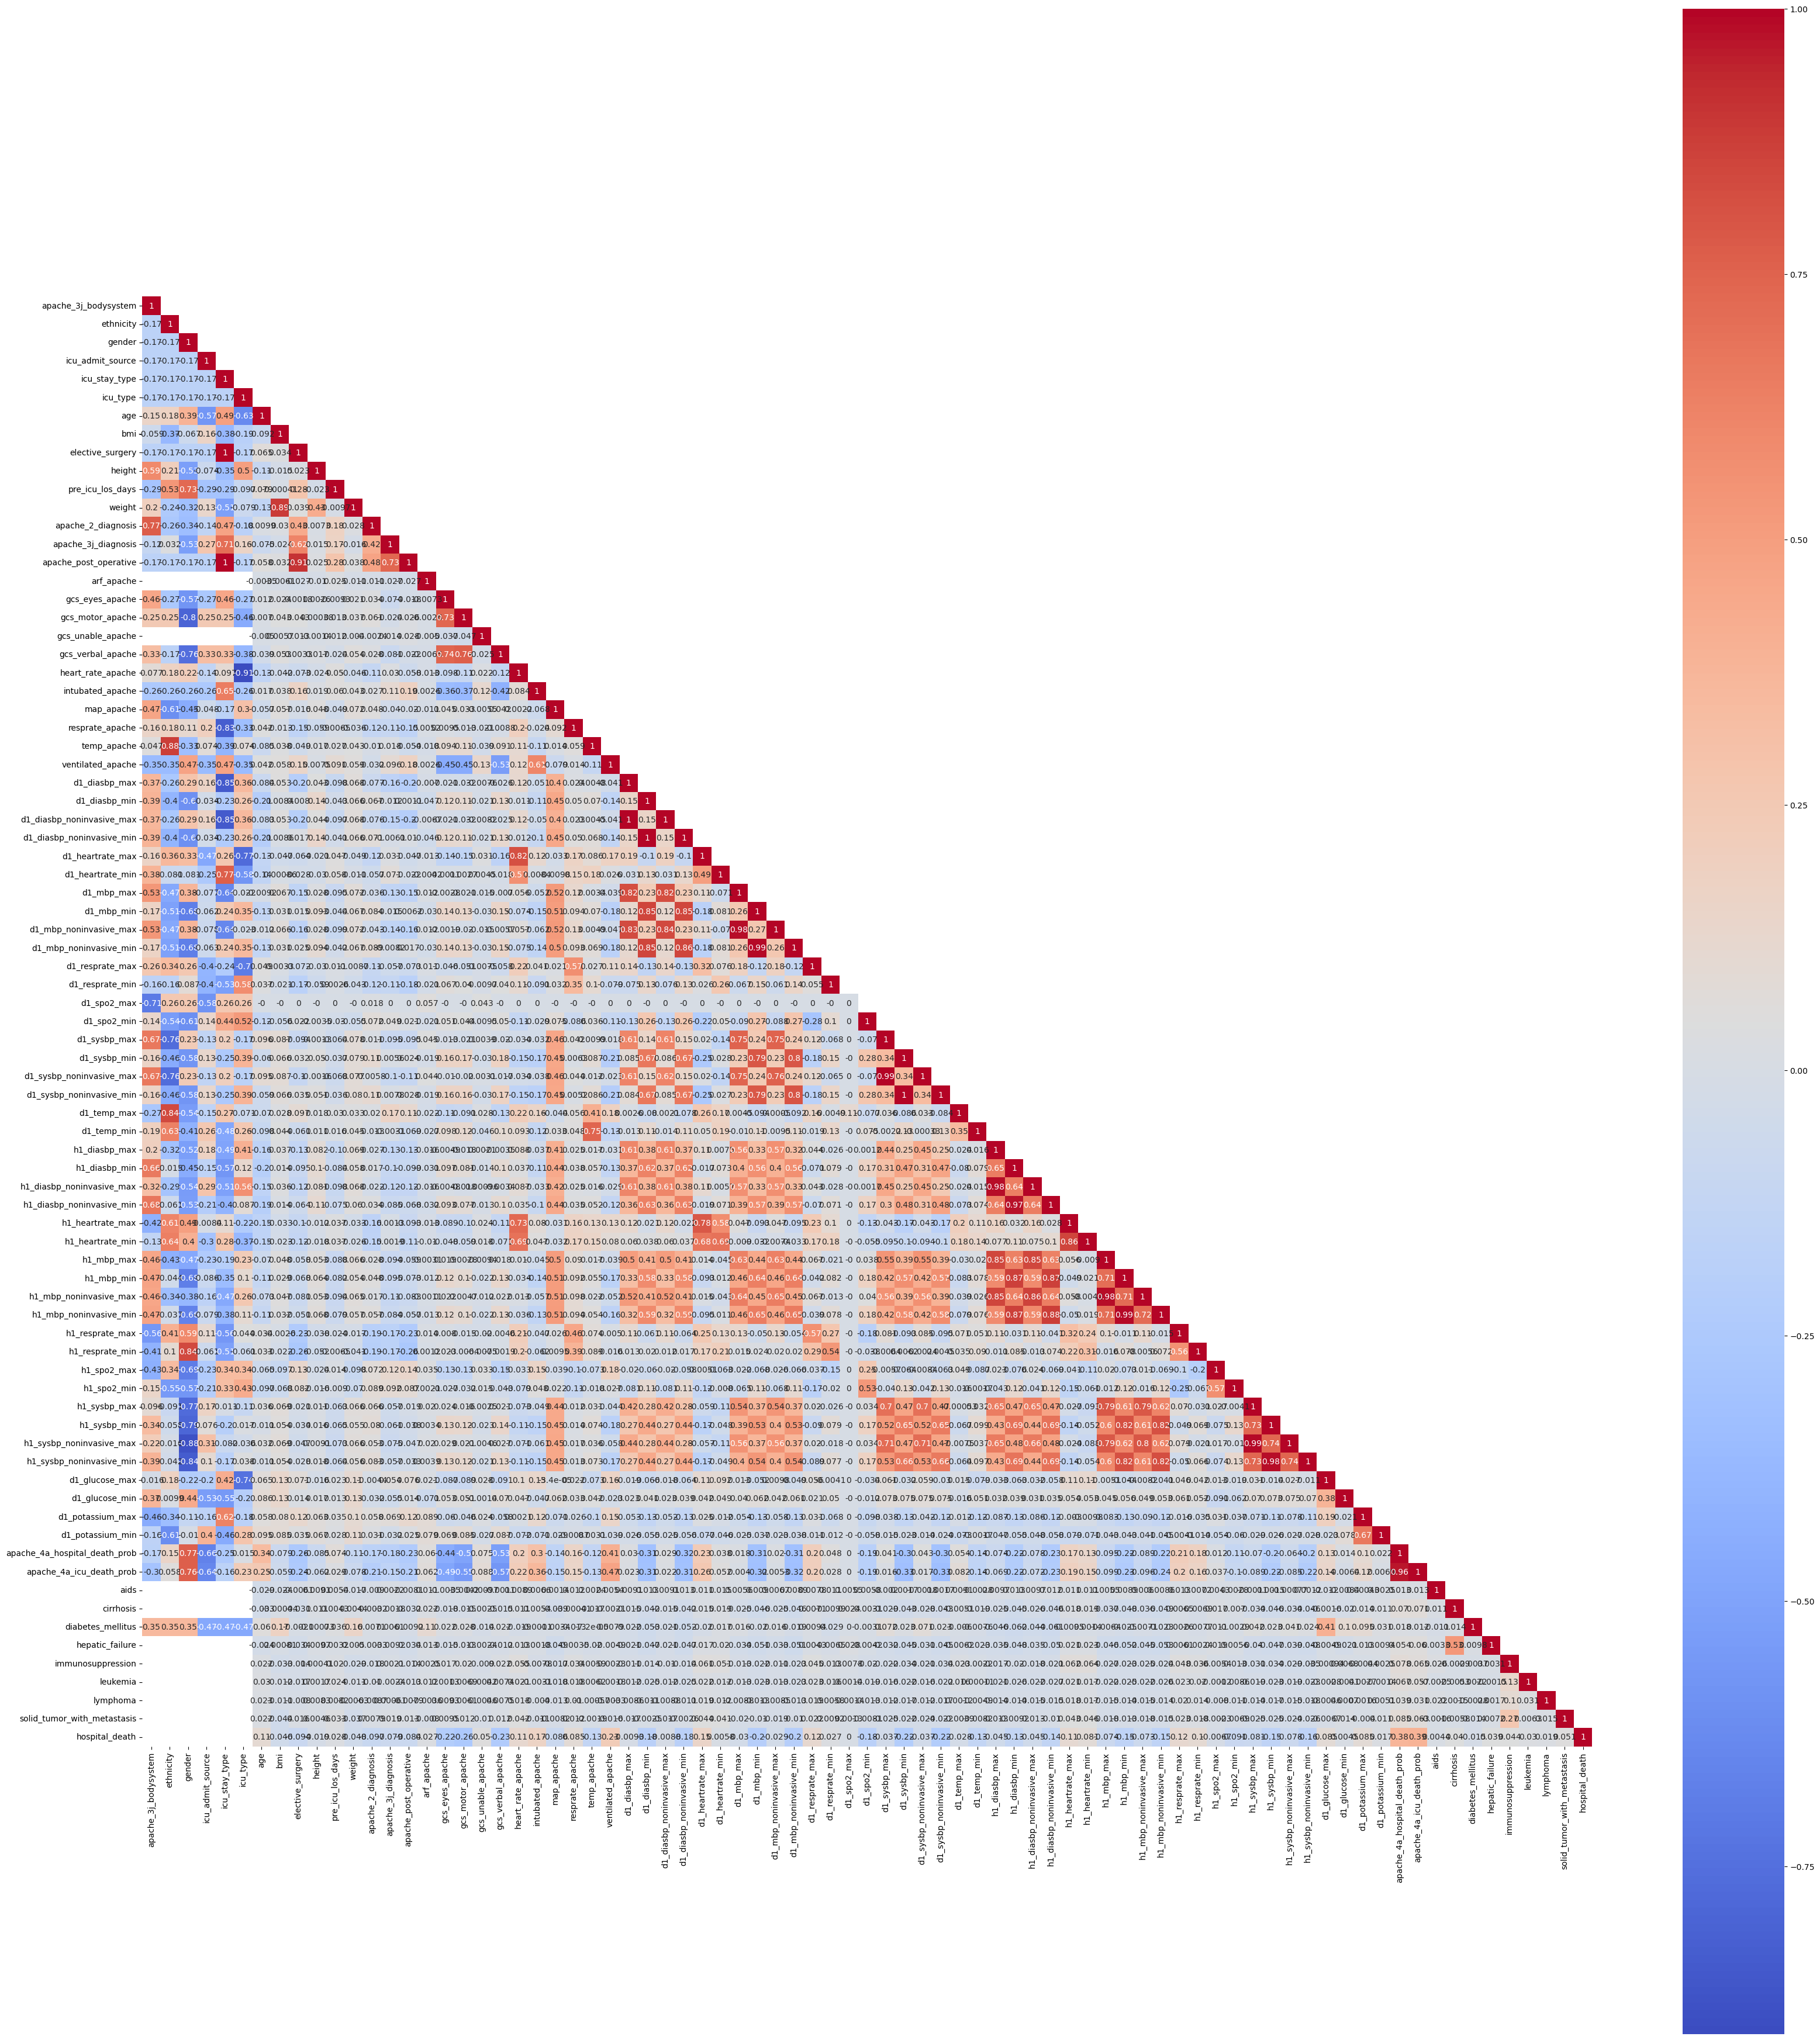

In [213]:

# Create a mask to hide the upper triangular part
mask = np.triu(np.ones_like(df.corr(), dtype=bool), k=1)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(40, 45))

# Create a heatmap using Seaborn with the mask
sns.heatmap(data=df.corr(), annot=True, cmap="coolwarm", mask=mask, square=True)

# Show the plot
plt.show()


# Bivariate analysis - boxplot for categorical variables and target column

# Bivariate analysis -scatter plot for numerical variables and target column

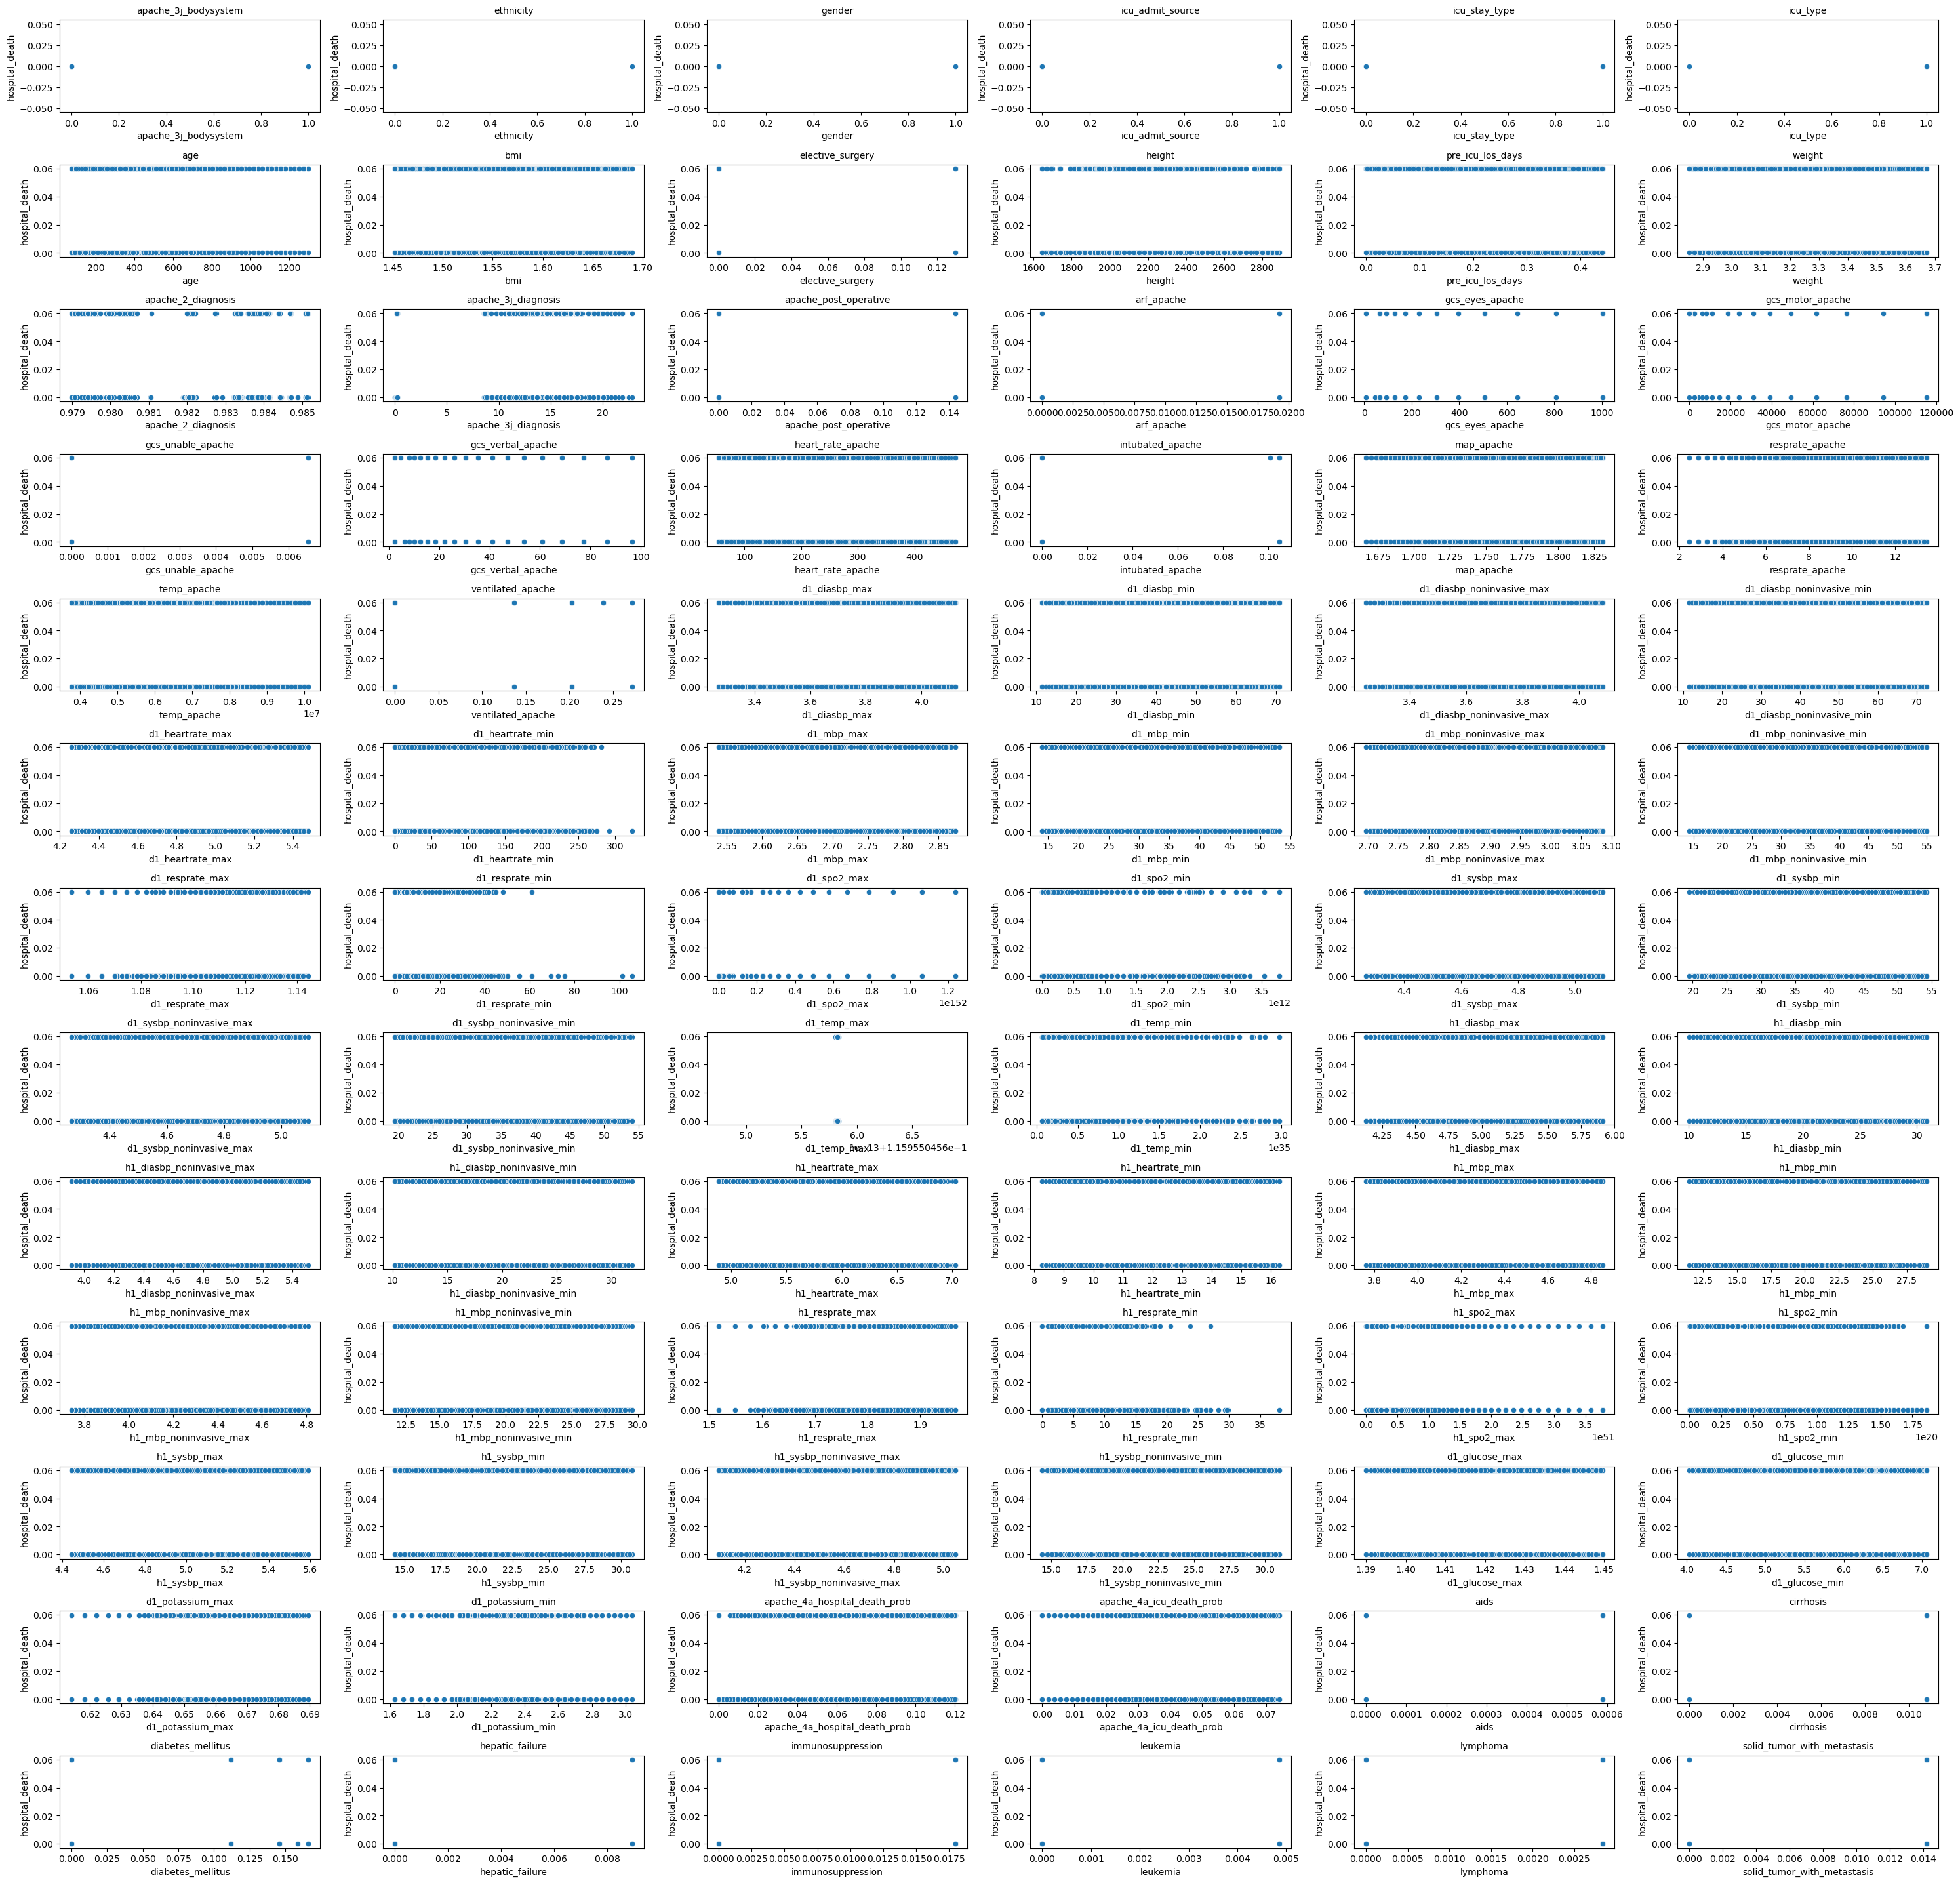

In [214]:
k = 0
plt.figure(figsize=(30, 35))

for col in range(len(df_num.columns) - 1):
    k = k + 1
    plt.subplot(16, 6, k)
    
    # Scatter plot
    ax = sns.scatterplot(x=df_num.columns[col], y='hospital_death', data=df)
    
    # Annotate with column name
    ax.annotate(df_num.columns[col], xy=(0.5, 1.1), ha='center', va='center', xycoords='axes fraction')

plt.tight_layout()
plt.show()

# Chi sqaure test 

In [215]:
import scipy.stats
import pandas as pd

contingency_table = pd.crosstab(df['age'], df['hospital_death'].astype(object))
chi2_stat, p_value, dof, expected = scipy.stats.chi2_contingency(contingency_table)

alpha = 0.05

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between age and hospital death.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between age and hospital death.")


Chi-Square Statistic: 1664.9851030340014
P-value: 2.5446709175868214e-226
Degrees of Freedom: 206
Reject the null hypothesis. There is a significant association between age and hospital death.


In [216]:
from scipy.stats import chi2_contingency
alpha = 0.05
contingency_table = pd.crosstab(df['ethnicity'], df['hospital_death'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
if p> alpha:
    print(" There is no significant association between 'ethnicity' and 'hospital_death'")
else:
    print( "There is significant association between 'ethnicity' and 'hospital_death'")

Chi-square statistic: 0.0
P-value: 1.0
 There is no significant association between 'ethnicity' and 'hospital_death'


# creating new csv file with pre- processced data for model building 

In [ ]:
df.to_csv('final_df.csv', index=False)